In [1]:
# imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# import python
import re
from operator import itemgetter

In [2]:
with pd.HDFStore("train.h5", "r") as train:
    # Note that the "train" dataframe is the only dataframe in the file
    df = train.get("train")

In [4]:
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


In [5]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710756 entries, 0 to 1710755
Data columns (total 111 columns):
id                1710756 non-null int16
timestamp         1710756 non-null int16
derived_0         1637797 non-null float32
derived_1         1629727 non-null float32
derived_2         1312105 non-null float32
derived_3         1561285 non-null float32
derived_4         1304298 non-null float32
fundamental_0     1686809 non-null float32
fundamental_1     1031686 non-null float32
fundamental_2     1341916 non-null float32
fundamental_3     1256376 non-null float32
fundamental_5     748736 non-null float32
fundamental_6     1009131 non-null float32
fundamental_7     1684416 non-null float32
fundamental_8     1337590 non-null float32
fundamental_9     1145189 non-null float32
fundamental_10    1597779 non-null float32
fundamental_11    1341916 non-null float32
fundamental_12    1599885 non-null float32
fundamental_13    1355618 non-null float32
fundamental_14    1354672 non-n

In [6]:
# Understand data size.

print('Total rows: ', len(df))
print('Total ids: ', len(df['id'].unique()))
print('Total timestamps: ', len(df['timestamp'].unique()))
# Unique id is of O(2000)
print('Min id: ', min(df['id']))
print('Max id: ', max(df['id']))
# Seems like no gap in timestamp.
print('Min timestamp: ', min(df['timestamp']))
print('Max timestamp: ', max(df['timestamp']))

Total rows:  1710756
Total ids:  1424
Total timestamps:  1813
Min id:  0
Max id:  2158
Min timestamp:  0
Max timestamp:  1812


In [7]:
# understand id distribution across time.

enum_bins = filter(lambda x: x[1] > 0, enumerate(np.bincount(df['id'])))
sorted_bins = sorted(enum_bins, key=itemgetter(1))
# print(sorted_bins[:20])

# Note: Each id might appear once before and stop appearing,
# then appearing again.
for row in df.itertuples():
    if row.id in []:
        print(row.id, row.timestamp, row.y)

# id -> last timestamp.
active_ids = dict()
for row in df.itertuples():
    if row.id in active_ids:
        # Print line if there is gaps between timestamps.
        if row.timestamp != active_ids[row.id] + 1:
            print('Violation: ', row.id, active_ids[row.id], row.timestamp)
    active_ids[row.id] = row.timestamp

Violation:  264 163 165
Violation:  306 157 186
Violation:  306 188 190
Violation:  306 191 194
Violation:  306 194 196
Violation:  306 196 199
Violation:  129 497 499
Violation:  1178 497 499
Violation:  1538 497 499
Violation:  129 580 582
Violation:  1178 580 582
Violation:  1538 580 582
Violation:  129 586 588
Violation:  1178 586 588
Violation:  1538 586 588
Violation:  129 623 625
Violation:  1178 623 625
Violation:  1538 623 625
Violation:  1178 686 690
Violation:  1538 686 690
Violation:  1178 690 692
Violation:  1538 690 692
Violation:  1178 695 697
Violation:  1538 695 697
Violation:  129 681 710
Violation:  1538 708 710
Violation:  1178 726 728
Violation:  1178 732 734
Violation:  1178 743 745
Violation:  1178 747 749
Violation:  1178 752 754
Violation:  1178 755 757
Violation:  1178 758 760
Violation:  1178 761 763
Violation:  1178 780 783
Violation:  1178 804 806
Violation:  1950 76 897
Violation:  1831 1037 1039
Violation:  289 942 1087
Violation:  1178 808 1151
Violation

[(62, 738), (63, 738), (64, 738), (65, 738), (66, 738), (67, 738), (60, 739), (61, 739), (52, 740), (53, 740)]
[(1699, 1086), (1700, 1086), (1701, 1086), (1702, 1086), (1703, 1086), (1704, 1086), (1705, 1086), (1706, 1086), (1811, 1086), (1812, 1086)]


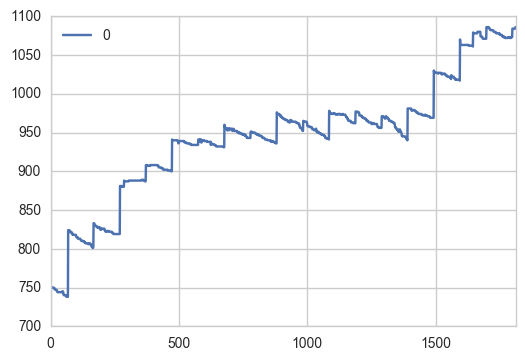

In [8]:
# Understand time distribution.

enum_bins = enumerate(np.bincount(df['timestamp']))
sorted_bins = sorted(enum_bins, key=itemgetter(1))
# In general, each timestamp has a lot of values, at least 738, and
# seems to be increasing in ids over time, i.e. more and more stocks
# being keep track in portfolio?
print(sorted_bins[:10])
print(sorted_bins[-10:])

DataFrame(list(np.bincount(df['timestamp']))).plot(kind='line')

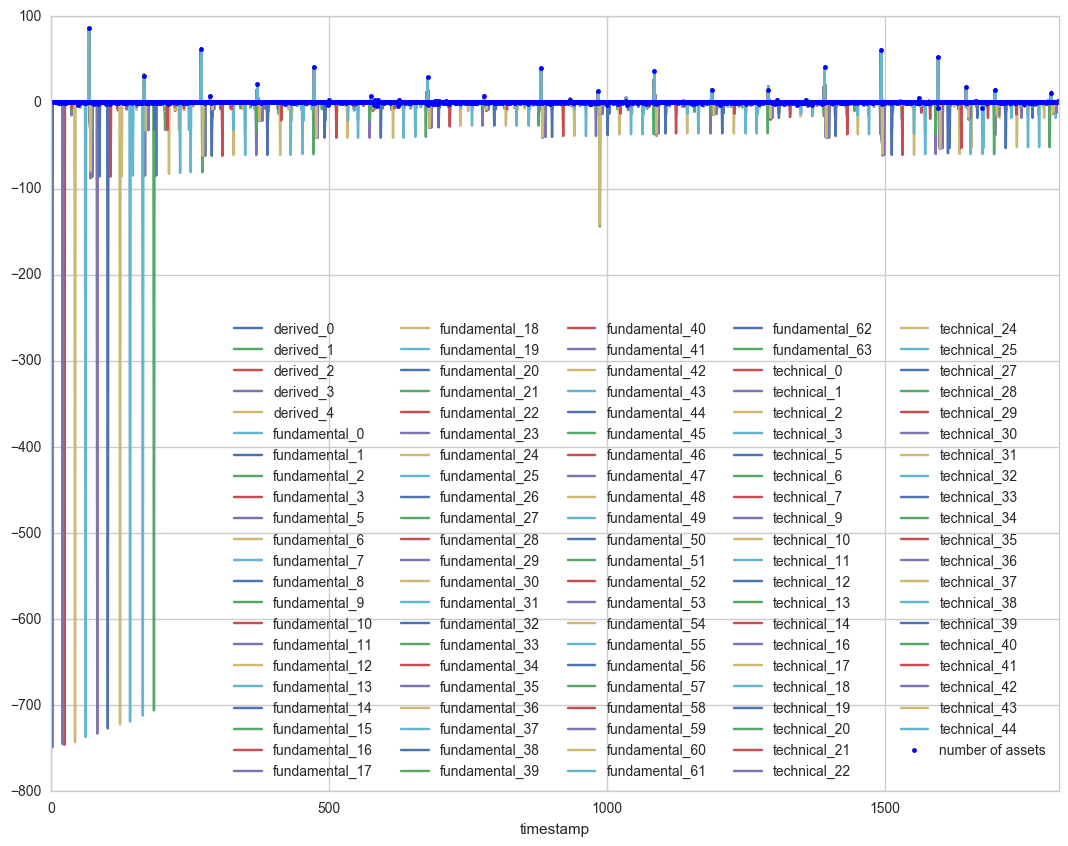

In [24]:
# Credit: From https://www.kaggle.com/cgump3rt/two-sigma-financial-modeling/missing-values-continued/discussion

nans = df.groupby('timestamp').apply(lambda x: x.isnull().sum())
nans = nans.diff().drop(['id', 'timestamp', 'y'], axis=1)

# get the number of assets per timestamp
nassets = df.groupby('timestamp').apply(len)
# get the change with respect to the previous timestamp
delta_assets = nassets.diff()

nans.plot(figsize=(13, 10))
delta_assets.plot(style=['.b'], ax=plt.gca(), label='number of assets')
plt.legend(ncol=5, loc='best')

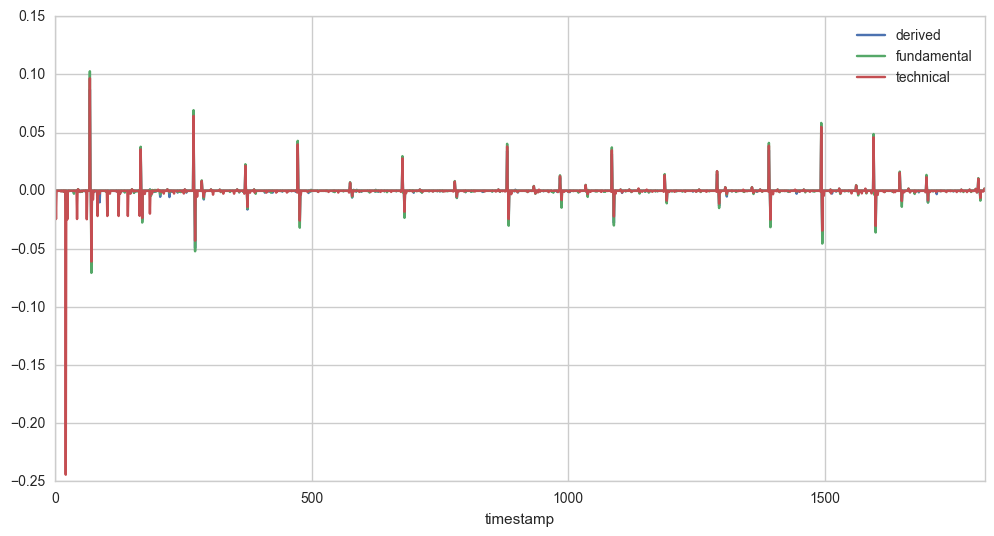

In [36]:
# get number of columns for each group
n_fundamental = len(
    [g for g in nans.columns.tolist() if re.search("fundamental_*",g)])
n_derived = len(
    [g for g in nans.columns.tolist() if re.search("derived_*",g)])
n_technical = len(
    [g for g in nans.columns.tolist() if re.search("technical_*",g)])

nans['fundamental'] = nans.filter(regex='fundamental_*').sum(axis=1)/nassets/n_fundamental
nans['derived'] = nans.filter(regex='derived_*').sum(axis=1)/nassets/n_derived
nans['technical'] = nans.filter(regex='technical_*').sum(axis=1)/nassets/n_technical
nans[['derived', 'fundamental', 'technical']].plot(figsize=(12,6));

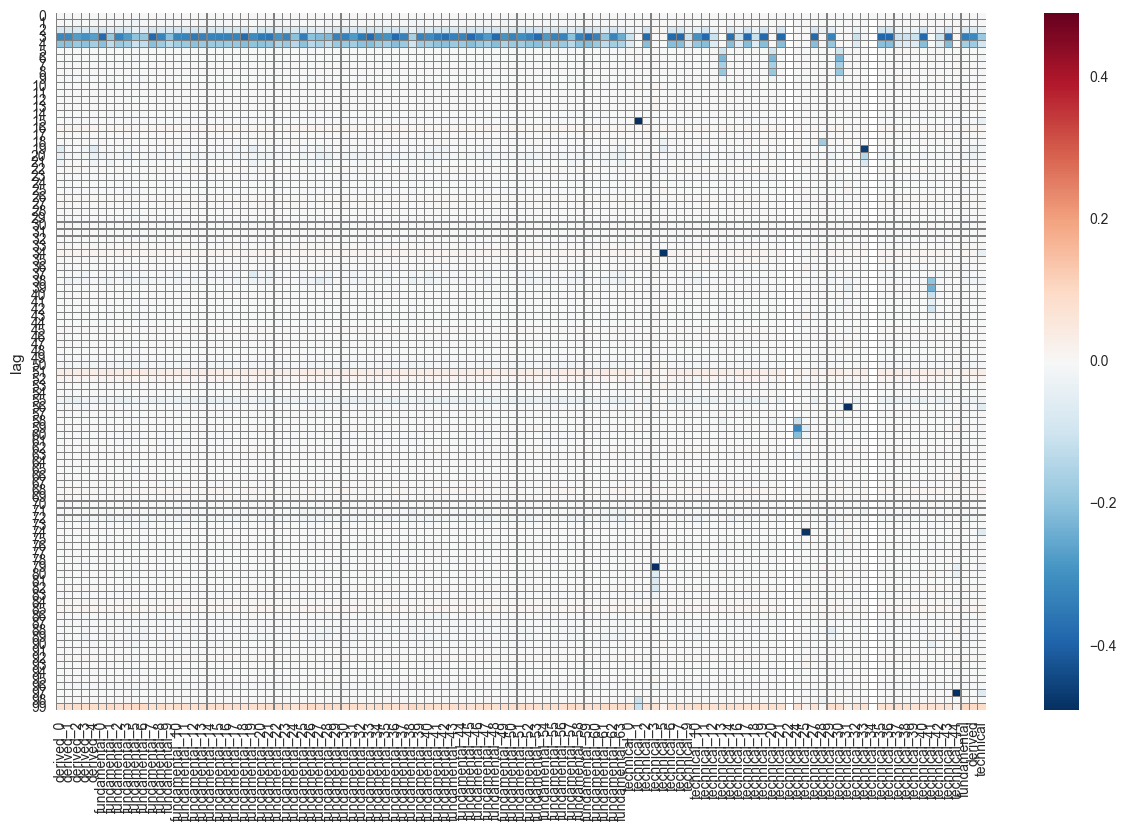

In [37]:
max_lag = 100
corrs = np.zeros((max_lag,nans.shape[1]))
for l in range(1,max_lag):
    c = delta_assets.shift(l)
    corrs[l] = nans.corrwith(c)

plt.figure(figsize=(15,9))
sns.heatmap(corrs,xticklabels=nans.columns.tolist(),linewidths=0.05,linecolor='gray')
plt.ylabel('lag');

In [38]:
# group by asset ID and get number of missing values for each feature column
ids = sorted(df.id.unique())
columns = df.columns.drop(['id','timestamp','y']).insert(0,'length')
nan_df = pd.DataFrame(data=None,index=ids,columns=columns,dtype=float)
# iterate over all asset ID
for name,group in df.groupby('id'):
    # for every feature column
    for c in columns:
        if c == 'length':
            nan_df.loc[name,c] = int(len(group))
        else:
            # total number of rows with missing data
            nan_df.loc[name,c] = float(group[c].isnull().sum())

In [39]:
# truncate all numbers at 100
capped = nan_df.copy()
capped[capped > 100] = 100
capped = capped.div(capped['length'],axis='index').drop(['length'],axis=1)
capped.head()

,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,...,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44
0,0.03,0.03,0.03,0.03,0.03,0.03,1.00,0.03,0.03,0.03,...,0.03,0.03,0.03,0.03,0.03,0.03,0.42,0.03,0.03,1.0
6,0.04,0.04,0.04,0.04,0.04,0.04,1.00,0.04,0.04,1.00,...,0.04,0.04,0.04,0.04,0.04,0.04,0.39,0.04,0.04,1.0
7,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.53,1.00,...,0.03,0.03,0.03,0.03,0.03,0.03,0.38,0.03,0.03,1.0
10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.21,0.21,0.21,0.00,0.24,0.21,0.00,1.0
11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.21,0.21,0.21,0.00,0.24,0.21,0.00,1.0


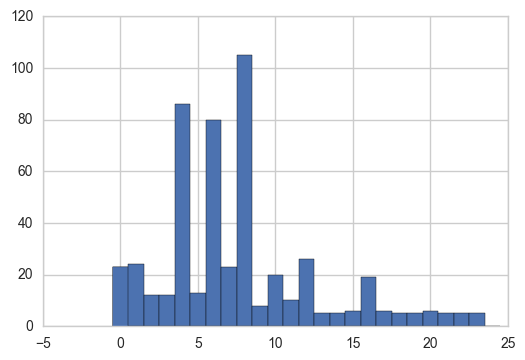

In [40]:
from sklearn.cluster import dbscan
_,labels = dbscan(capped.values)
plt.hist(labels,bins=25,range=(-0.5,24.5));

Min y:  -0.0860941
Max y:  0.0934978


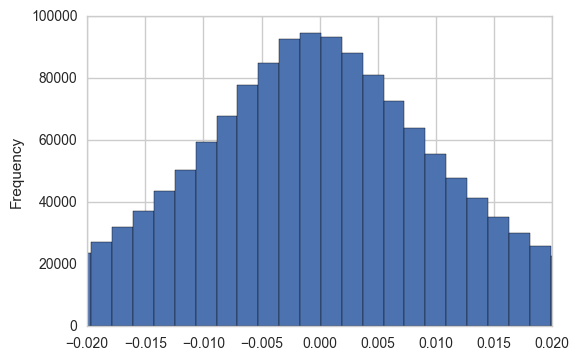

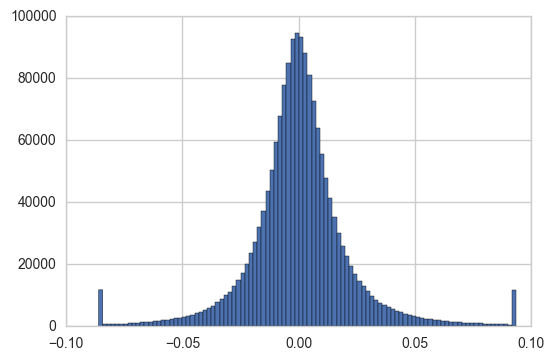

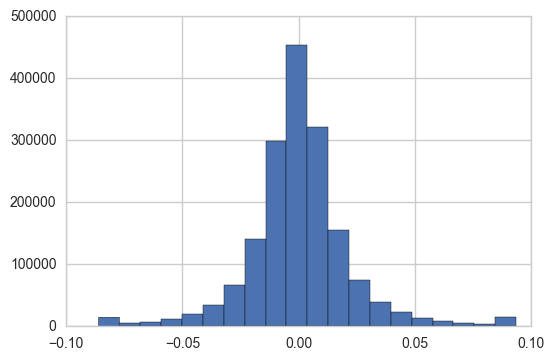

In [49]:
# Understand range / distribution of y

# y is pretty much normal distributed.
df['y'].plot(kind='hist', xlim=(-0.02, 0.02), bins=100)
print('Min y: ', min(df['y']))
print('Max y: ', max(df['y']))

# Looking at the histogram, seems like there is some huge
# outlier at the end.
fig = plt.figure()
df['y'].hist(bins=100)

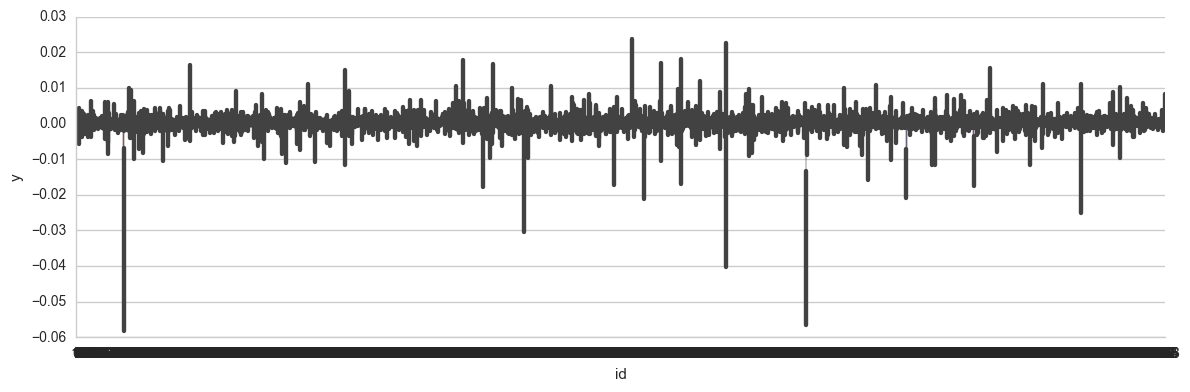

In [51]:
# It seems like most of the ids have mean very close to within abs(0.001)
# but there is some with outlier means.
# This plot has confidence interval computed using bootstrapping and 
# it seems like the variance can be pretty big.
sns.factorplot('id', 'y', kind='bar', data=df[['id', 'y']], size=4, aspect=3)

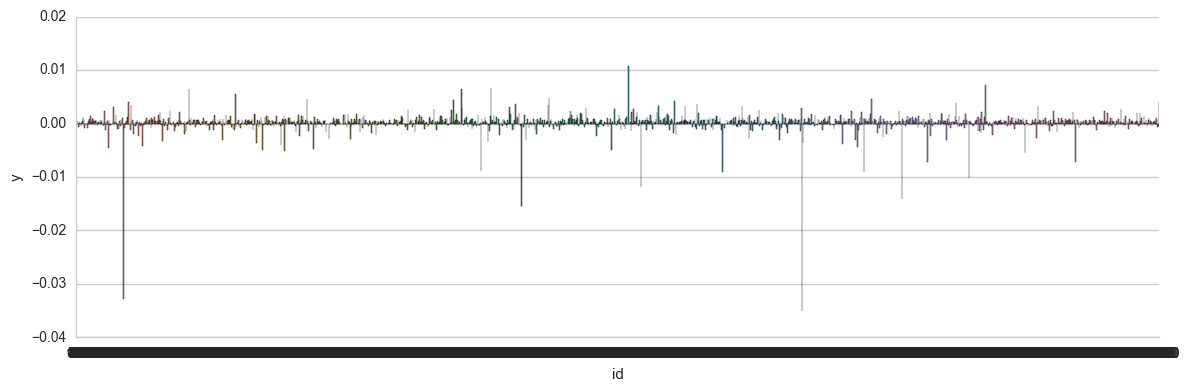

In [52]:
# Plotting without confidence interval.
id_mean = df[['id', 'y']].groupby('id').apply(np.mean)
sns.factorplot('id', 'y', kind='bar', data=id_mean, size=4, aspect=3)

In [70]:
# We tried to look at the outlier and see whether the overall
# distributions look very different from the rest.
id_len = df[['id', 'y']].groupby('id').apply(len)

outlier_ids = []
print('Id', 'Mean y', '# rows')
for row in id_mean.itertuples():
    if np.abs(row.y) > 0.01:
        print(row.id, row.y, id_len[row.id])
        outlier_ids.append(int(row.id))

print('-------------')
# But we noticed that the variance is high too, with huge
# positive and huge negative.
# However, it seems like there are very little unique y?
for row in df.itertuples():
    if row.id == 93:
        print(row.id, row.y)
        
print('-------------')

print('Total rows: ', len(df))
# Not exactly! Only about 10% is overlapping...
print('Total unique y: ', len(df['y'].unique()))

Id Mean y # rows
93.0 -0.0327968 25
882.0 -0.0154077 14
1089.0 0.0108265 14
1118.0 -0.0118479 133
1431.0 -0.0350766 27
1637.0 -0.0140283 245
1778.0 -0.0102332 173
-------------
93 -0.0860941
93 -0.0624702
93 0.024334
93 0.010733
93 -0.0860941
93 -0.00821516
93 -0.0589524
93 -0.0860941
93 -0.0860941
93 -0.0860941
93 -0.0860941
93 -0.0860941
93 -0.0860941
93 0.0372503
93 0.00546016
93 -0.0860941
93 -0.0860941
93 -0.0860941
93 0.0934978
93 -0.0860941
93 0.0934978
93 -0.0860941
93 0.0934978
93 0.0934978
93 -0.0228269
-------------
Total rows:  1710756
Total unique y:  1672946


In [85]:
# Now look into min, max for each features, group by id.
features_min = df.dropna().groupby('id').apply(np.amin)
features_max = df.dropna().groupby('id').apply(np.amax)

In [89]:
features_min.head(25)

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,1105.0,-0.427430,-0.054304,-0.071088,-0.005038,-0.487231,-0.191943,0.209200,-0.106887,...,-0.553699,-9.455906e-01,-9.526339e-01,-0.928206,-0.141797,-0.208386,-0.945591,-2.000000e+00,-0.059839,-0.070552
16,16.0,272.0,-1.057133,0.160950,0.088248,-0.522144,-1.895162,-0.309496,-0.425292,-1.264507,...,-1.551366,-9.526339e-01,-9.455906e-01,-0.937500,-0.128457,-0.253475,-0.989707,-2.000000e+00,-0.064473,-0.086094
22,22.0,573.0,-1.011706,-0.027079,-0.032081,-0.194410,-0.318084,-0.255321,-0.235881,-0.438280,...,-1.018422,-9.526400e-01,-9.970396e-01,-0.999845,0.052972,-0.268264,-0.997040,-2.000000e+00,-0.045512,-0.086094
38,38.0,391.0,-0.387973,-0.056951,-0.104230,-0.284232,-0.529588,-0.218209,-0.288179,-0.137611,...,-0.805240,-9.526400e-01,-9.526400e-01,-0.952640,-0.080316,-0.243197,-0.997756,-2.000000e+00,-0.042162,-0.086094
40,40.0,1394.0,-0.090082,-0.024770,-0.560006,-1.840591,-0.724806,-0.289230,-0.039743,-8.906848,...,-0.506839,-9.375000e-01,-9.608868e-01,-0.958765,-0.315213,-0.222755,-0.000000,-2.000000e+00,-0.051348,-0.086094
41,41.0,1003.0,-0.821039,-0.057456,0.072322,-0.238110,-1.142015,-0.282794,-0.453936,-0.241315,...,-1.128286,-9.526339e-01,-4.371316e-15,-0.952634,-0.165918,-0.307338,-0.945601,-2.000000e+00,-0.046314,-0.086094
64,64.0,1796.0,-0.151827,-0.018429,-0.034159,-0.107875,-0.471955,-0.276504,-0.241831,0.006060,...,1.016977,-1.334816e-09,-9.519305e-06,-0.000010,0.133052,0.064920,-0.000010,-2.823240e-09,-0.023304,-0.021506
70,70.0,185.0,-0.211833,-0.052230,-0.082861,-0.166621,-1.299692,-0.254510,0.045417,-0.117032,...,-0.640022,-9.970480e-01,-9.966090e-01,-0.996599,-0.098301,-0.353425,-0.996600,-2.000000e+00,-0.055873,-0.050902
87,87.0,185.0,0.071311,0.054548,0.278369,-1.833520,0.098309,0.160015,-0.098134,-0.114398,...,-1.377016,0.000000e+00,0.000000e+00,0.000000,1.569265,-0.236718,0.000000,-2.000000e+00,-0.079035,-0.086094


In [88]:
features_max.head(25)

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,1812.0,0.031061,0.033937,0.000735,0.072241,0.321770,-0.024650,0.564921,0.549132,...,0.502551,-1.183291e-29,-8.574926e-26,-7.006492e-45,0.040371,0.217742,9.526339e-01,-3.330669e-16,0.041618,0.086561
16,16.0,1812.0,0.597523,21.374203,1.006725,0.099671,0.148570,0.213158,0.893687,4.642228,...,3.297911,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.714569,0.370386,9.965994e-01,-3.330669e-16,0.107677,0.093498
22,22.0,1812.0,0.387812,0.157613,0.152831,-0.013315,0.352237,0.090207,0.298754,0.585347,...,0.803194,-0.000000e+00,0.000000e+00,0.000000e+00,0.355413,0.251488,0.000000e+00,-3.330669e-16,0.081735,0.093498
38,38.0,1812.0,0.369979,-0.006767,0.047660,0.008311,0.386848,0.018796,0.175960,0.819569,...,1.185665,-1.286330e-38,-2.057106e-42,-0.000000e+00,0.183343,0.309578,9.587654e-01,-3.330669e-16,0.042446,0.093498
40,40.0,1812.0,0.042266,0.112696,0.249370,-0.210882,0.063678,-0.065153,0.039338,0.086070,...,0.471624,-0.000000e+00,0.000000e+00,-2.812901e-27,-0.006542,0.357791,9.455906e-01,-1.337260e-10,0.011470,0.093498
41,41.0,1812.0,-0.166181,0.033193,0.215160,0.046070,0.362795,-0.073712,0.148097,1.000521,...,1.062033,-1.076616e-28,-0.000000e+00,-1.076616e-28,0.205649,0.388817,9.526339e-01,-1.258380e-06,0.047717,0.093498
64,64.0,1812.0,-0.150511,-0.017932,-0.033886,-0.103079,-0.470199,-0.273687,-0.238587,0.011398,...,1.057469,-1.100812e-10,-7.850498e-07,-7.850498e-07,0.133316,0.303204,-7.850498e-07,-2.328306e-10,0.003555,0.027254
70,70.0,1075.0,0.100478,0.000958,-0.032423,0.077235,1.222020,-0.012899,0.266580,0.167868,...,0.567636,0.000000e+00,0.000000e+00,0.000000e+00,0.165275,0.213883,9.455899e-01,-4.548584e-13,0.052905,0.093498
87,87.0,1812.0,0.071311,0.054548,0.278369,-1.833520,0.098309,0.160015,-0.098134,-0.114398,...,-1.377016,0.000000e+00,0.000000e+00,0.000000e+00,1.569265,0.420142,0.000000e+00,-2.000000e+00,0.051920,0.093498


In [84]:
# Seems like non of the features are normalized.., and their ranges could
# be very big.
for column in df.columns:
    print(column, min(df[column].dropna()), max(df[column].dropna()))

id 0 2158
timestamp 0 1812
derived_0 -20175.0 3252.53
derived_1 -0.0737543 1.06845e+16
derived_2 -9848.88 3823.0
derived_3 -34341.8 1239.74
derived_4 -8551.91 67859.6
fundamental_0 -2.34496 1.37819
fundamental_1 -1.04374e+13 520.317
fundamental_2 -1077.1 76.7712
fundamental_3 -0.373403 6.55233
fundamental_5 -0.139273 1535.05
fundamental_6 -1.07027 121.495
fundamental_7 -0.339008 522165.0
fundamental_8 -0.174428 39.4331
fundamental_9 -1685.84 39.6586
fundamental_10 -0.0845313 345.406
fundamental_11 -750.537 116.748
fundamental_12 -0.0344615 92704.0
fundamental_13 -0.31893 1445.21
fundamental_14 -0.108138 40588.3
fundamental_15 -0.186592 254.265
fundamental_16 -980.225 0.854424
fundamental_17 -3.63698e+16 1.04028e+18
fundamental_18 -1695.4 48.8941
fundamental_19 -2.28776 1152.07
fundamental_20 -51902.4 1782.45
fundamental_21 -1.87039 3.50545
fundamental_22 -0.351803 269.096
fundamental_23 -0.184058 143825.0
fundamental_24 -68.5027 28.7397
fundamental_25 -0.312751 366.542
fundamental_26 -

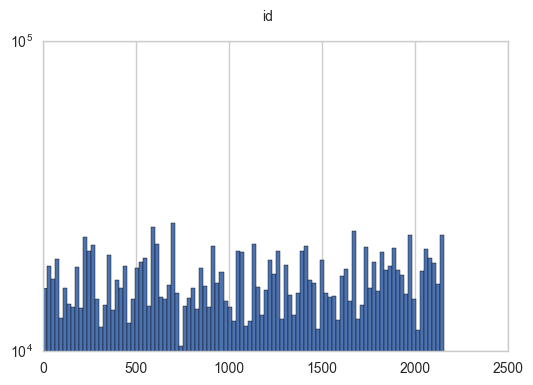

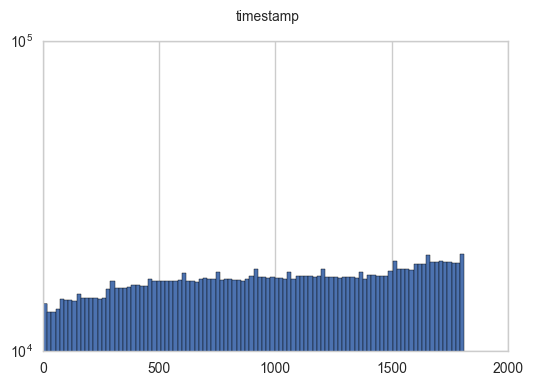

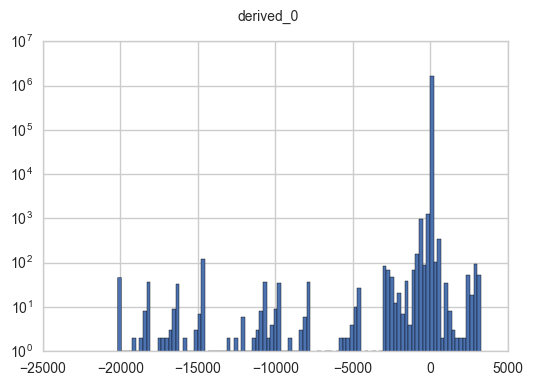

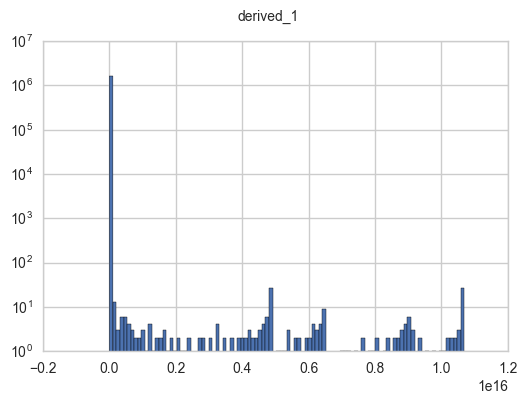

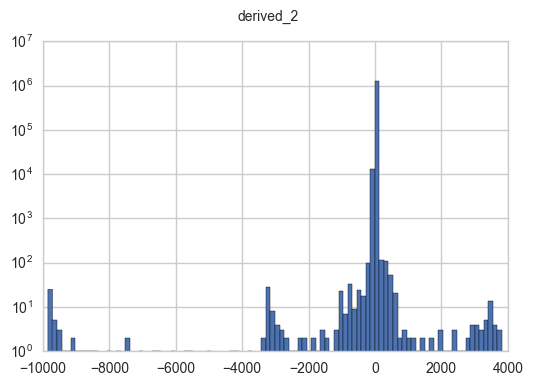

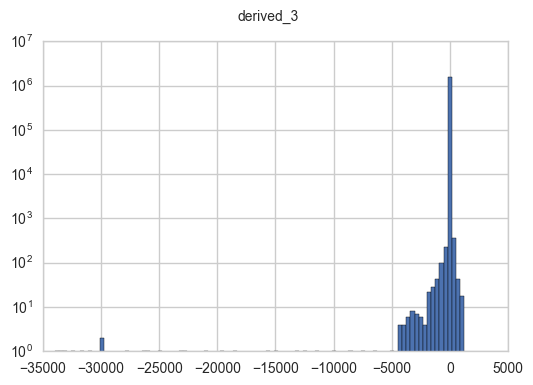

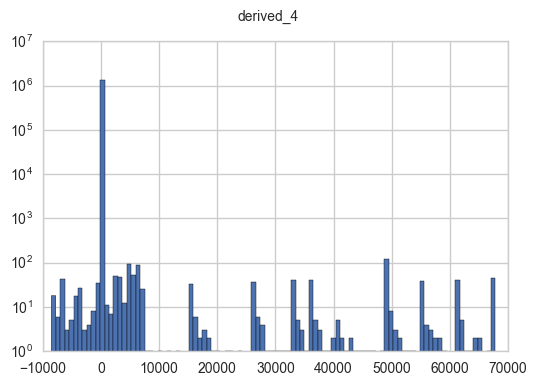

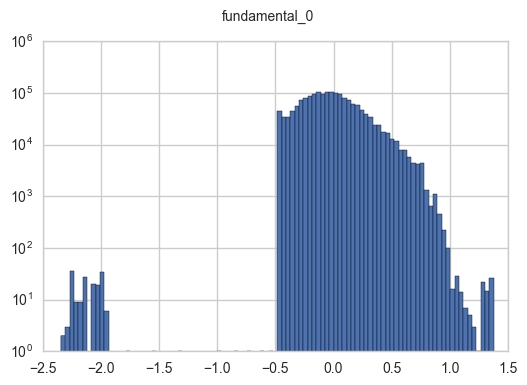

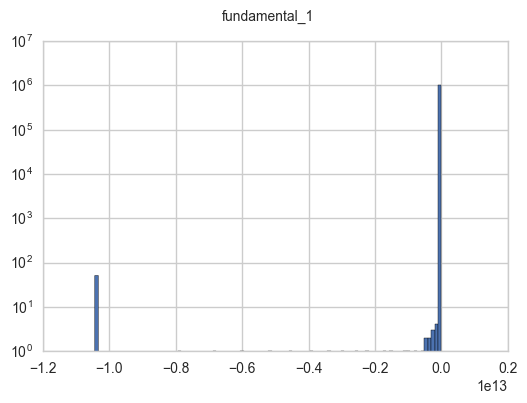

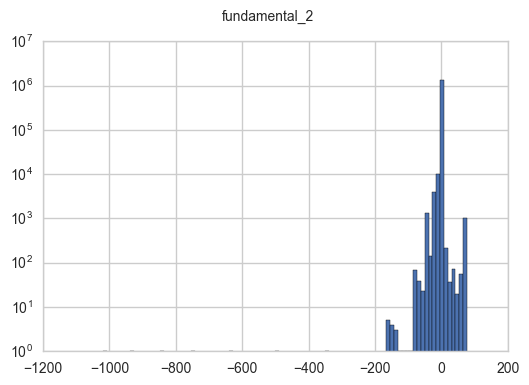

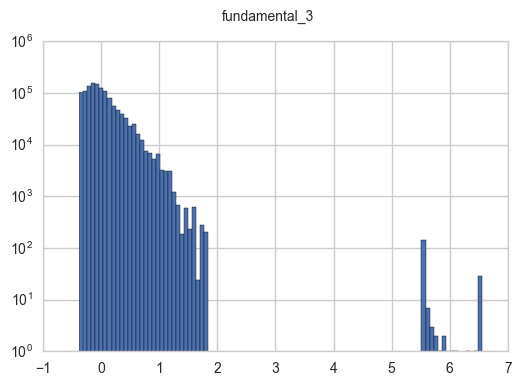

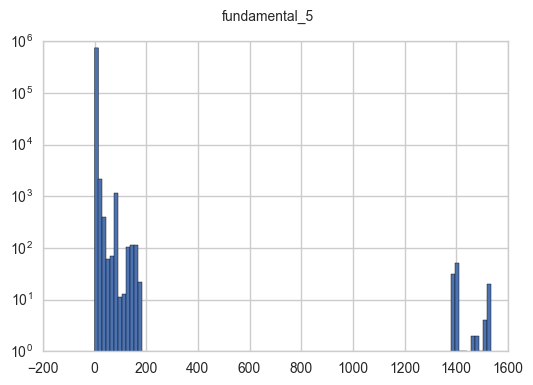

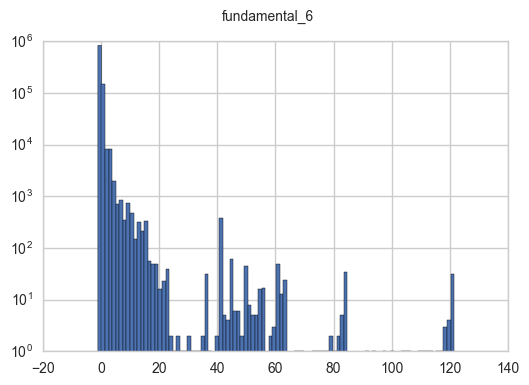

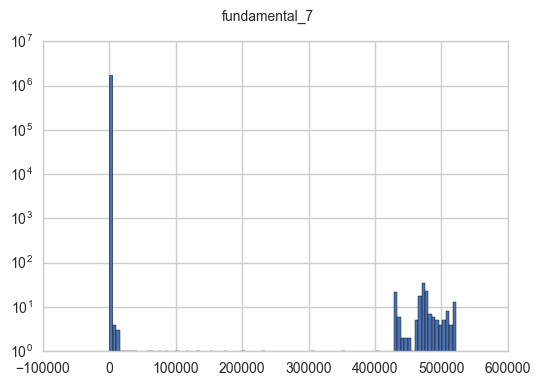

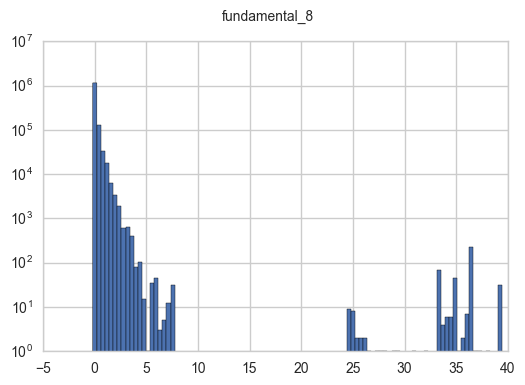

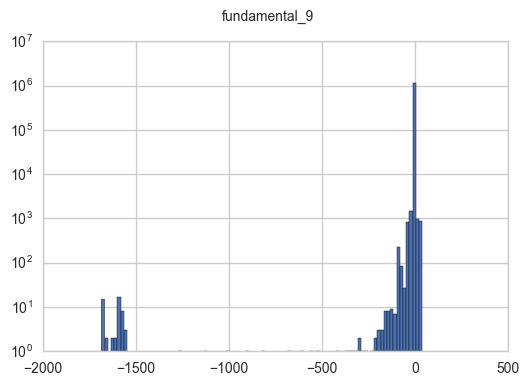

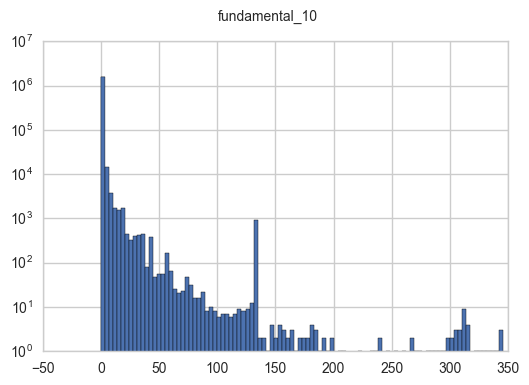

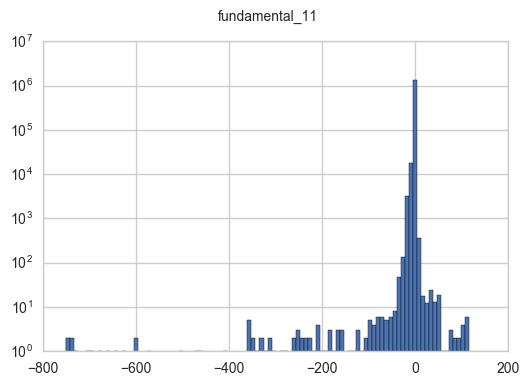

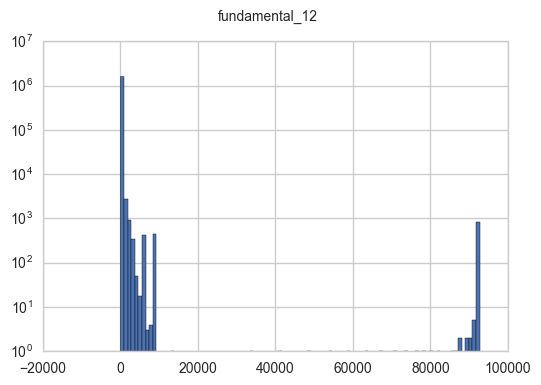

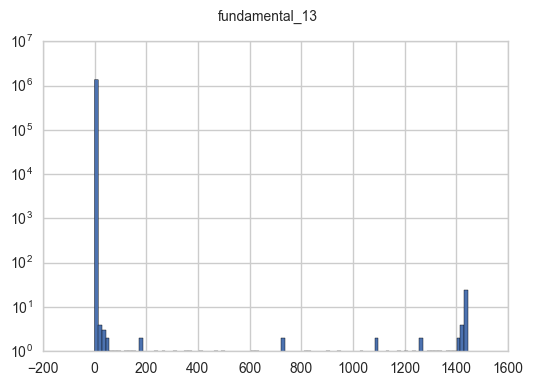

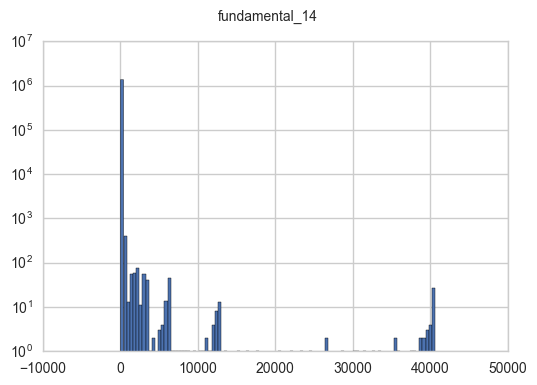

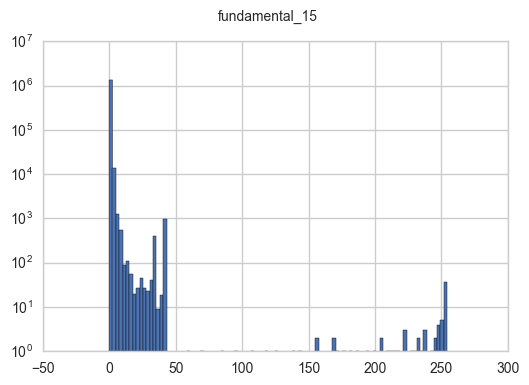

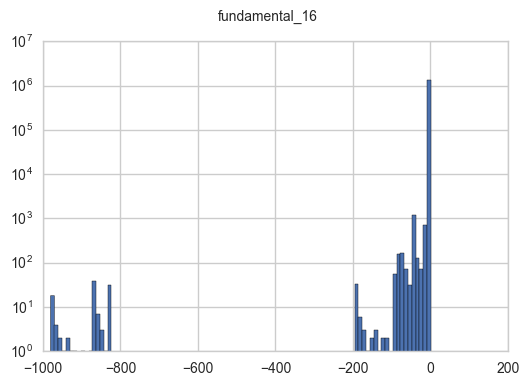

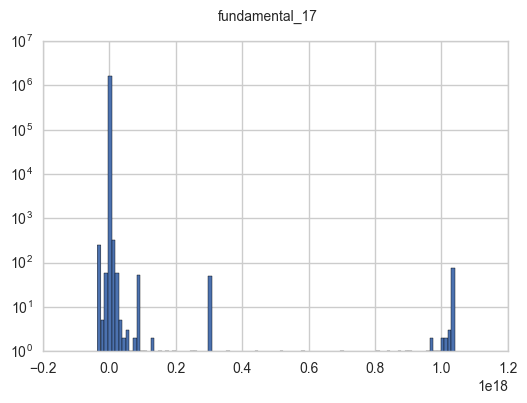

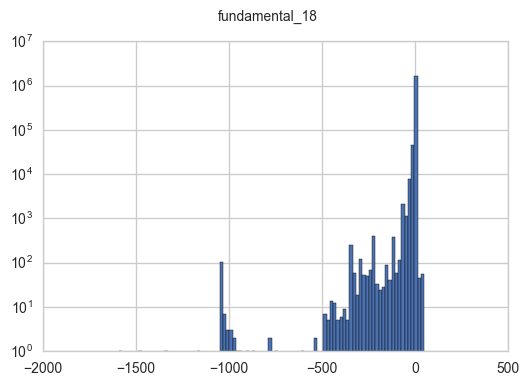

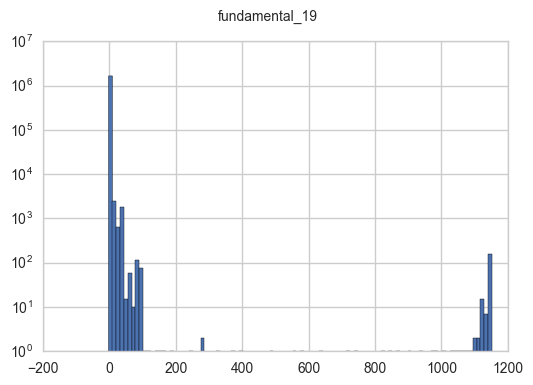

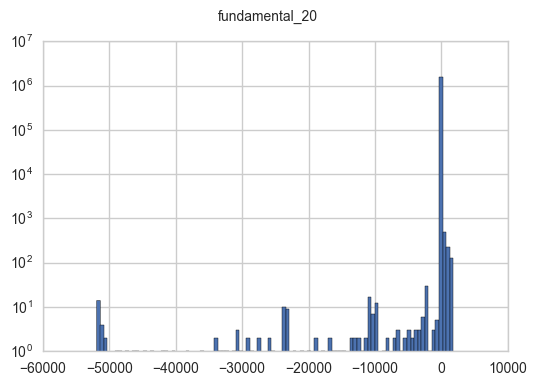

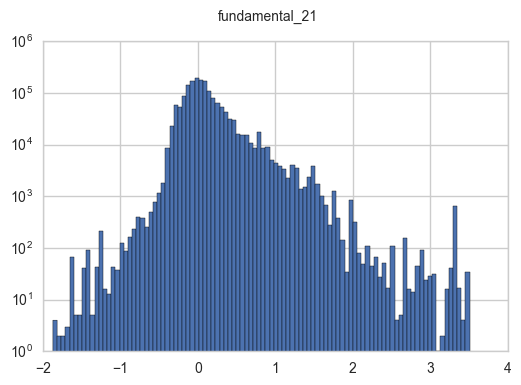

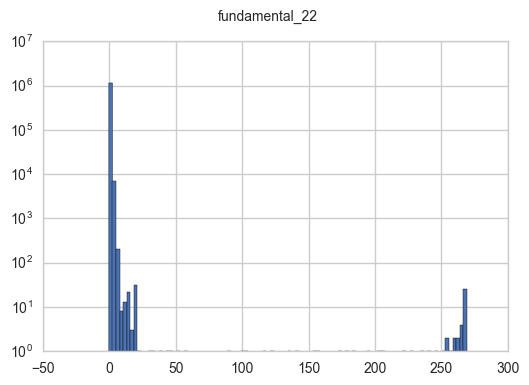

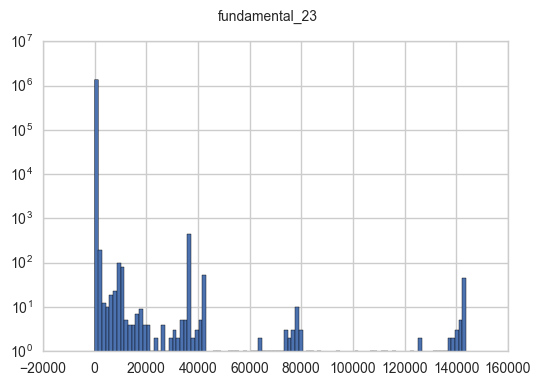

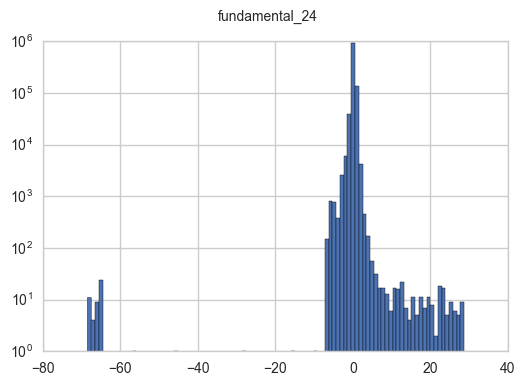

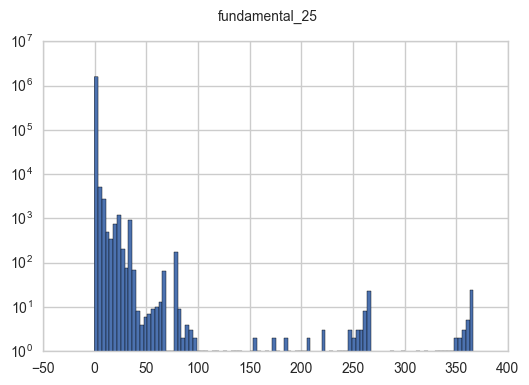

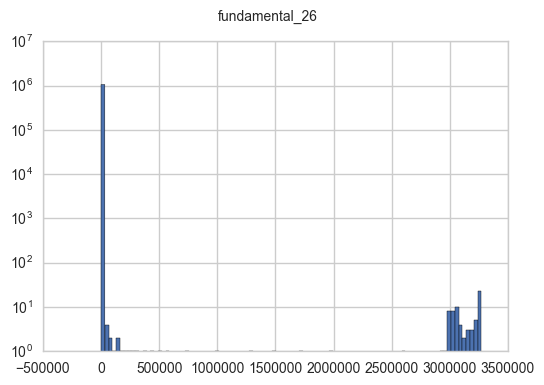

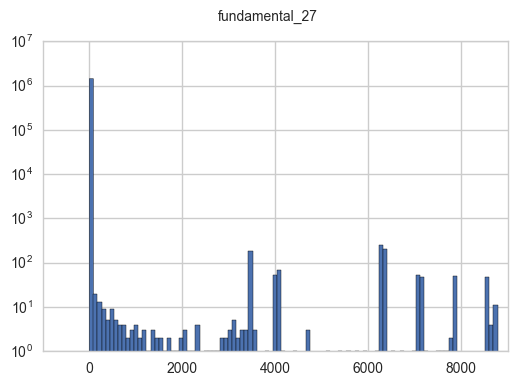

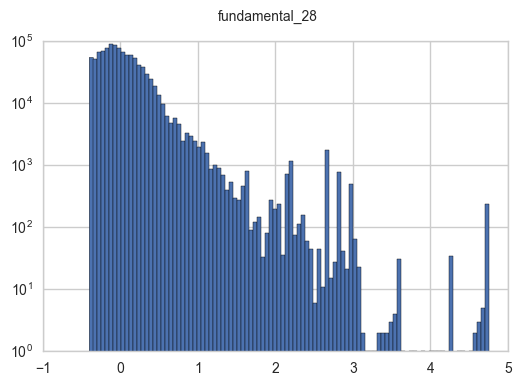

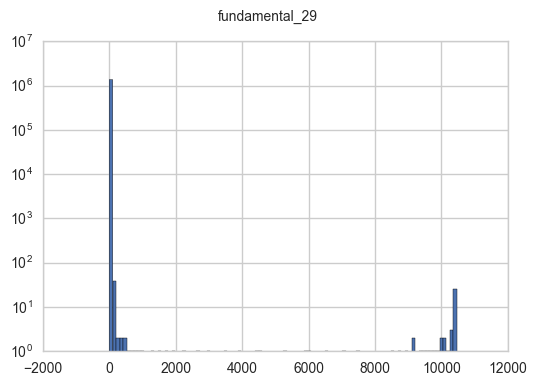

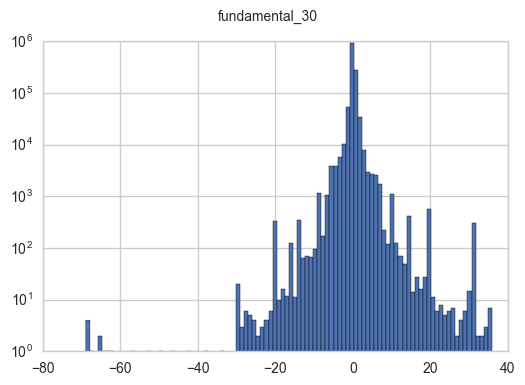

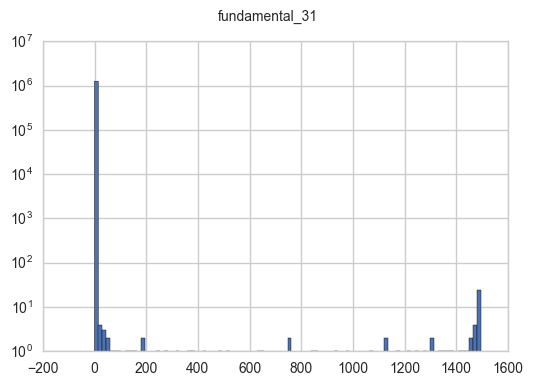

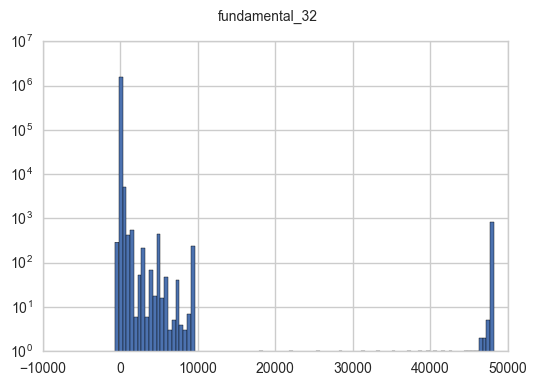

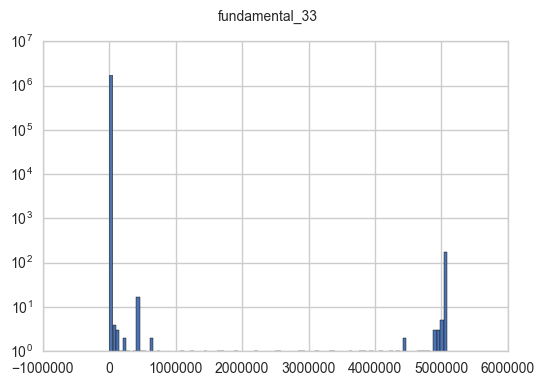

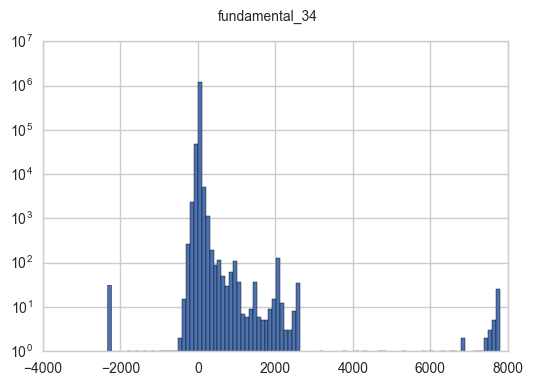

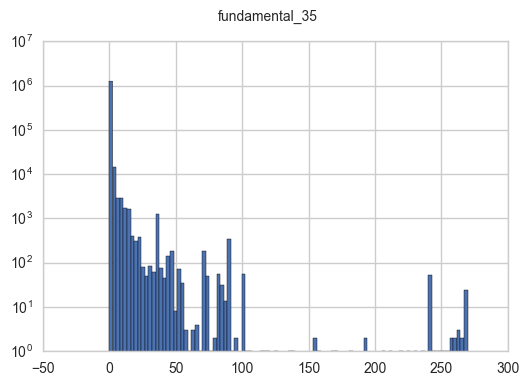

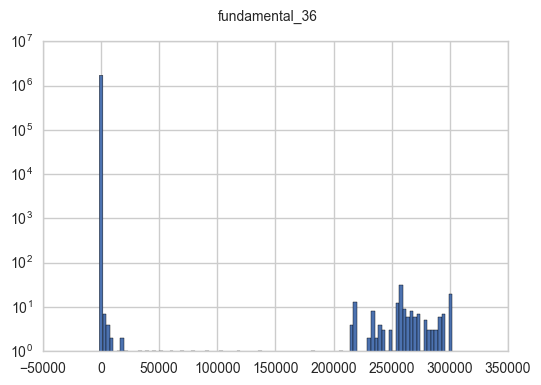

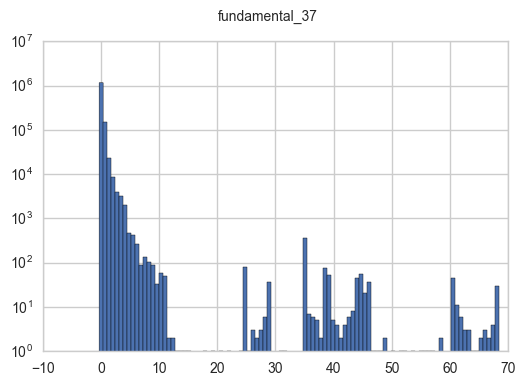

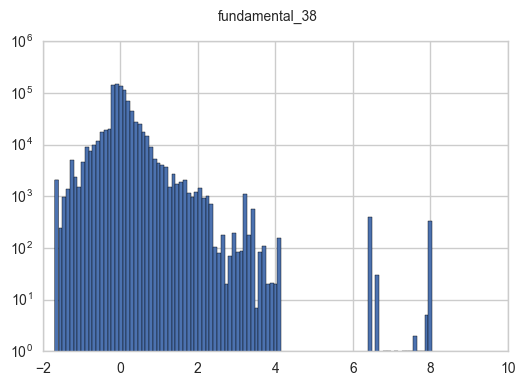

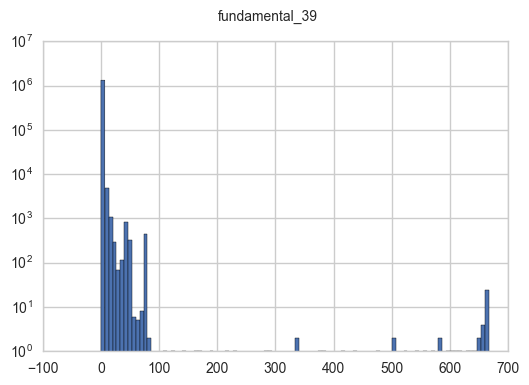

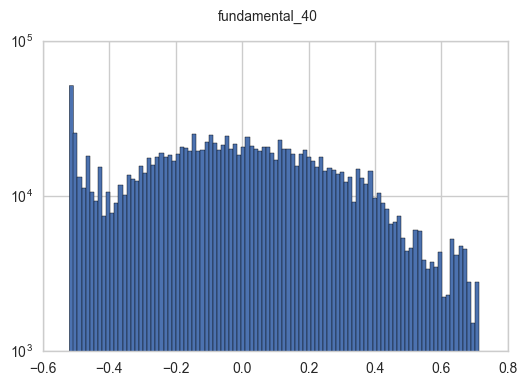

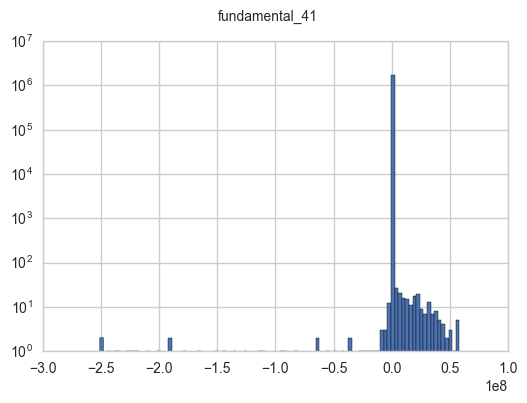

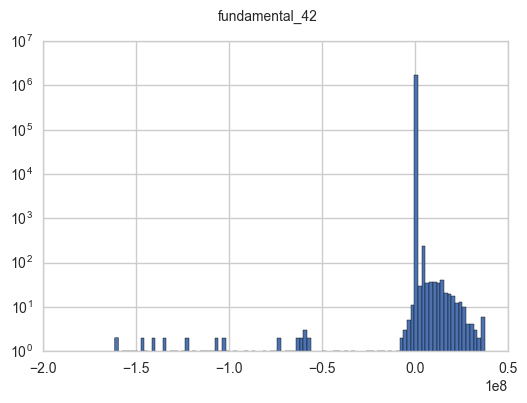

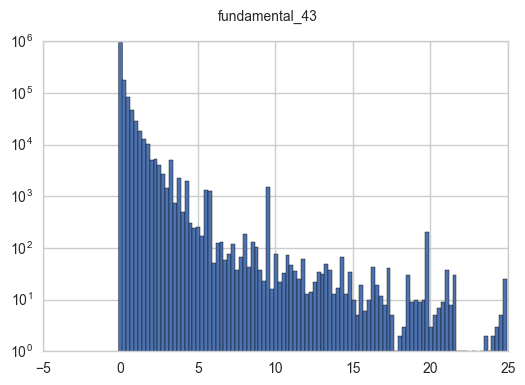

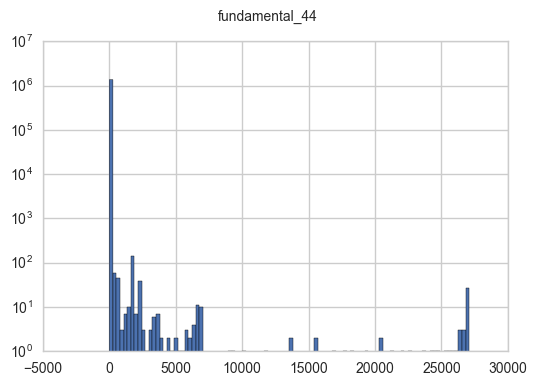

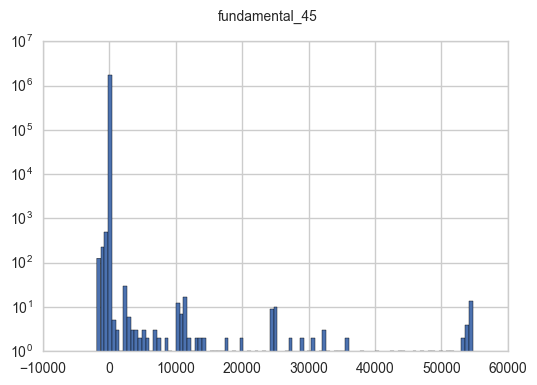

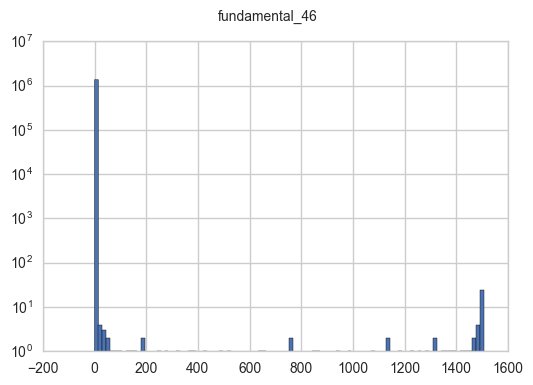

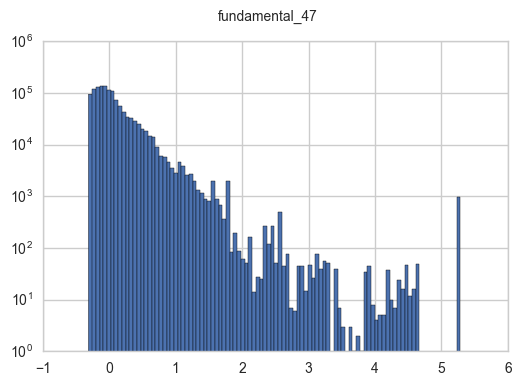

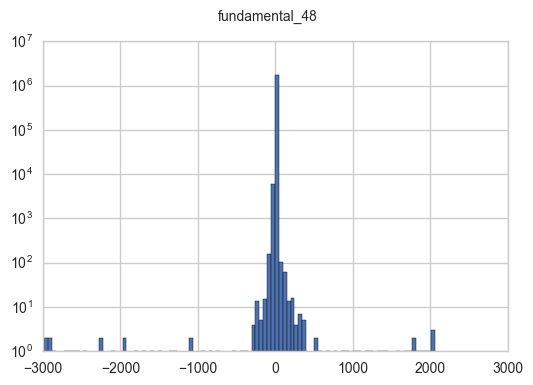

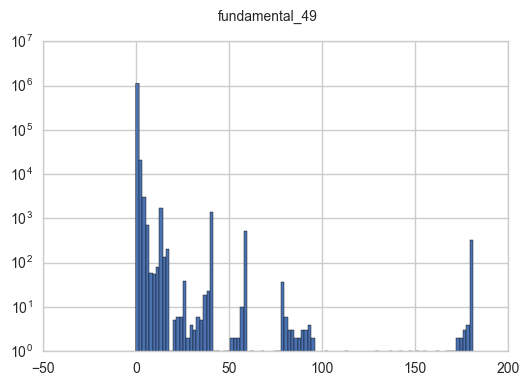

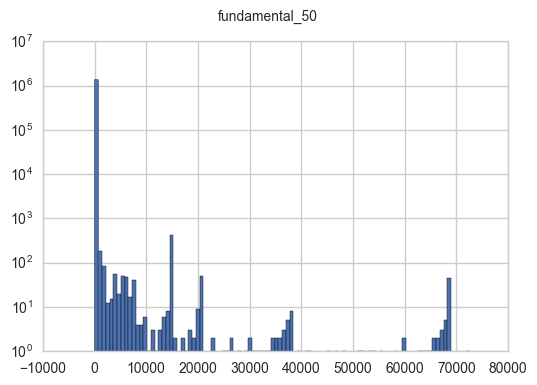

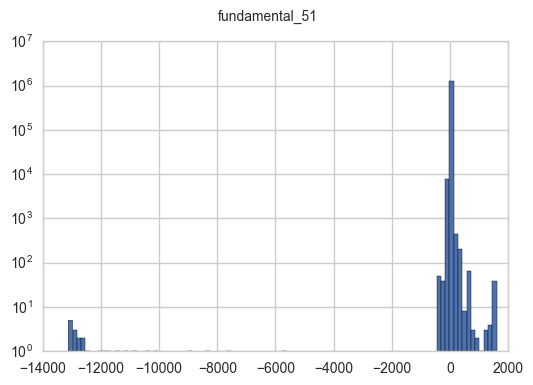

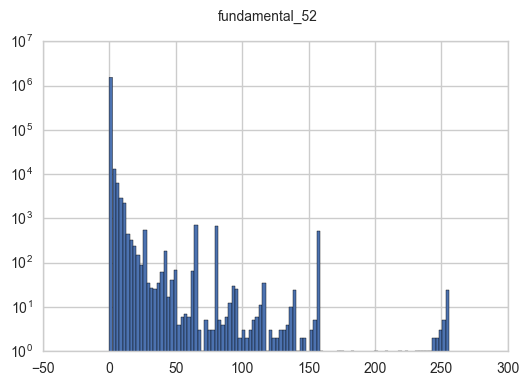

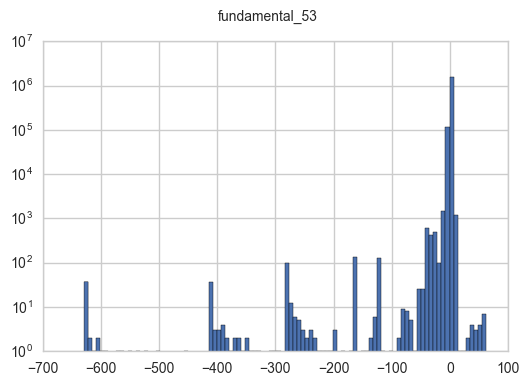

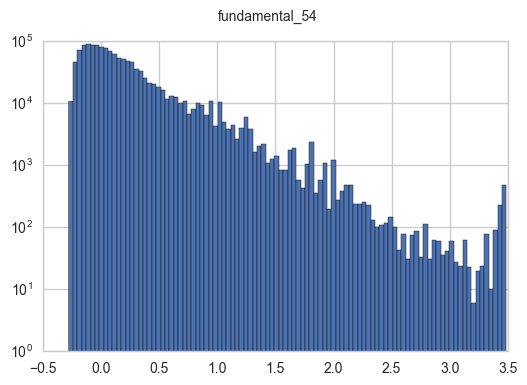

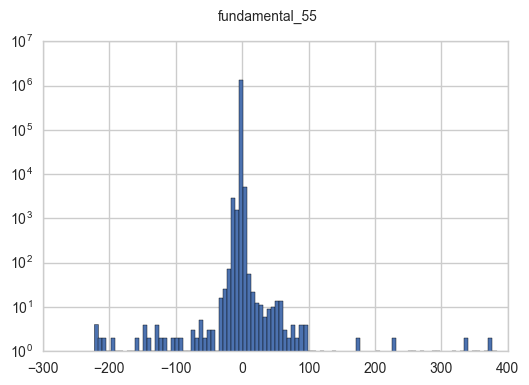

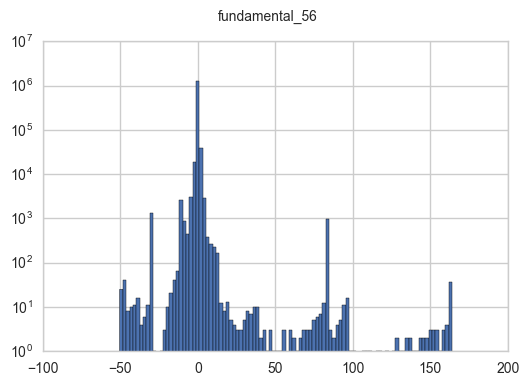

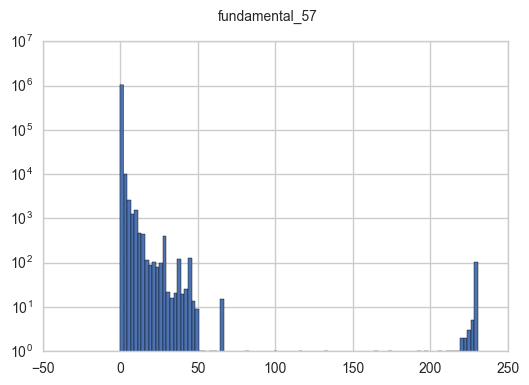

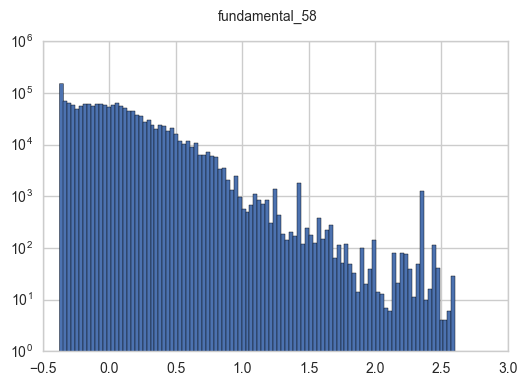

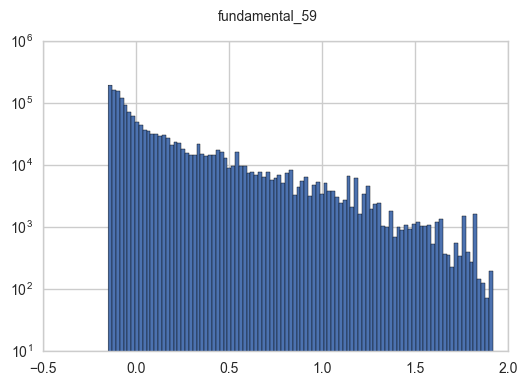

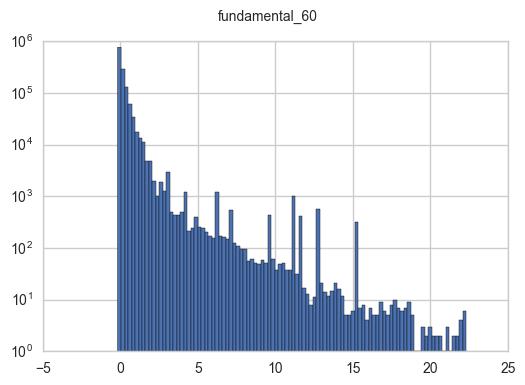

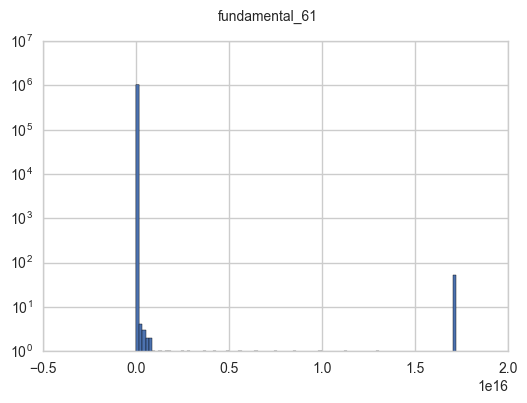

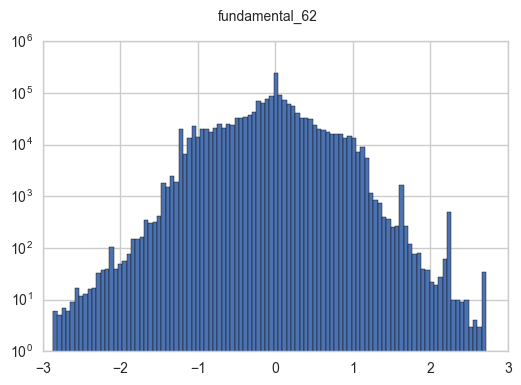

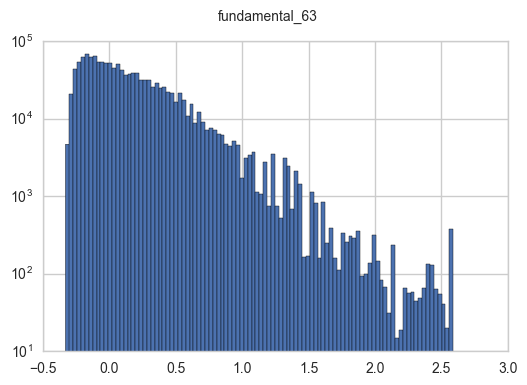

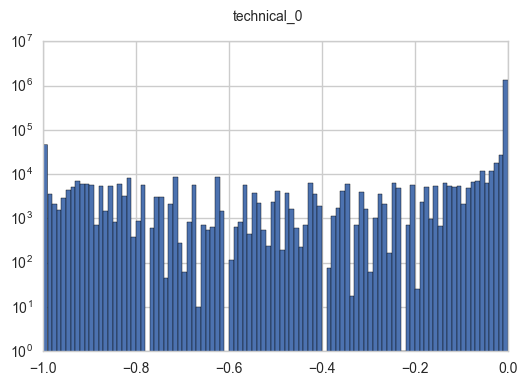

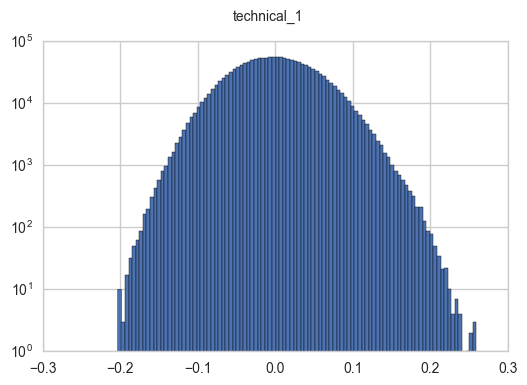

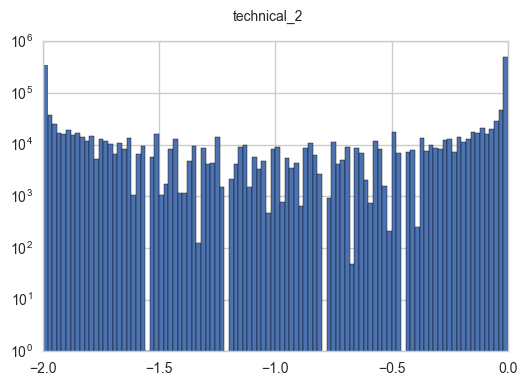

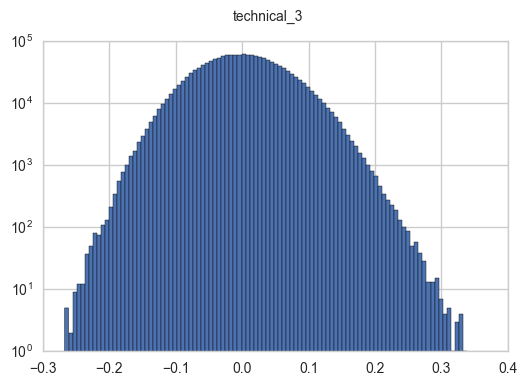

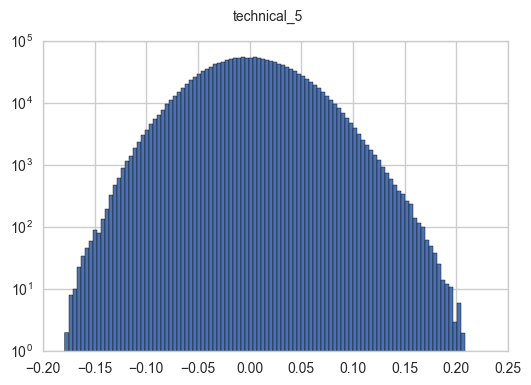

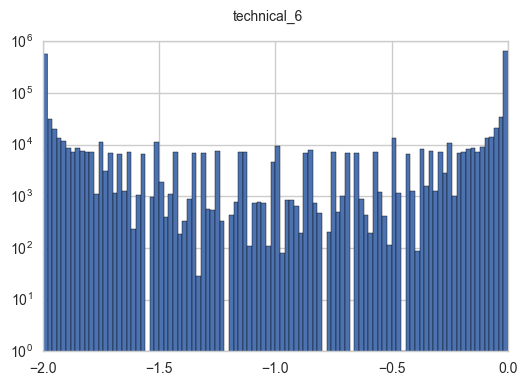

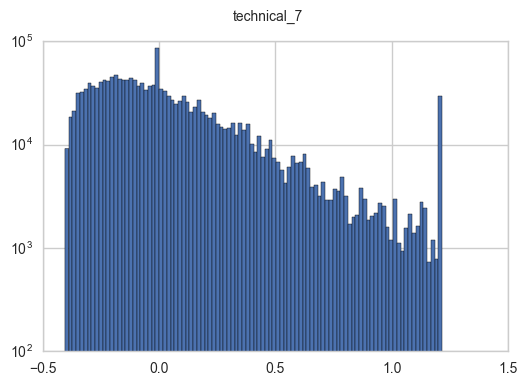

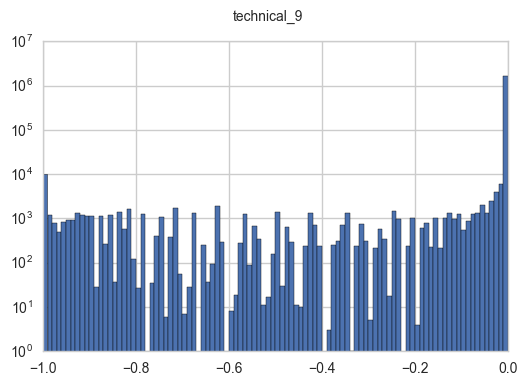

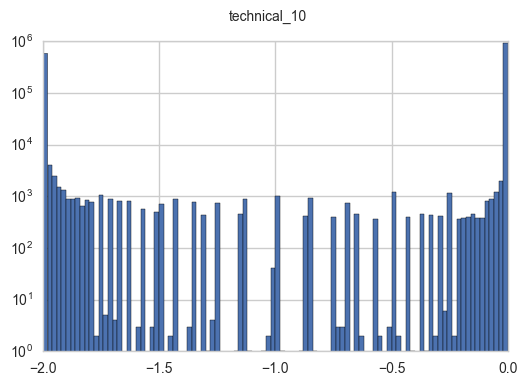

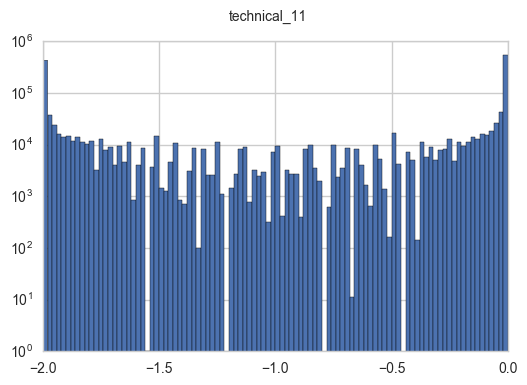

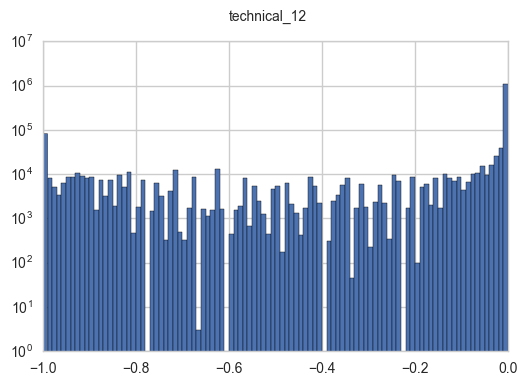

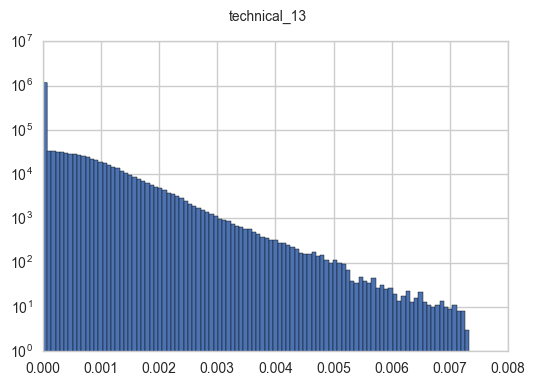

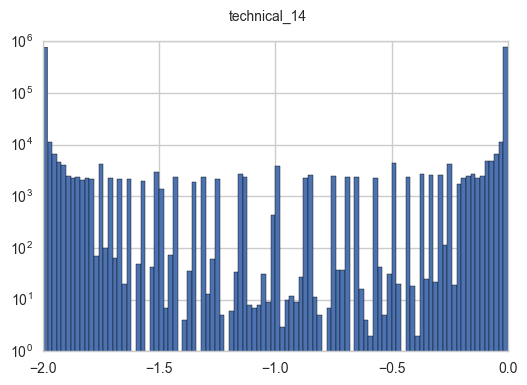

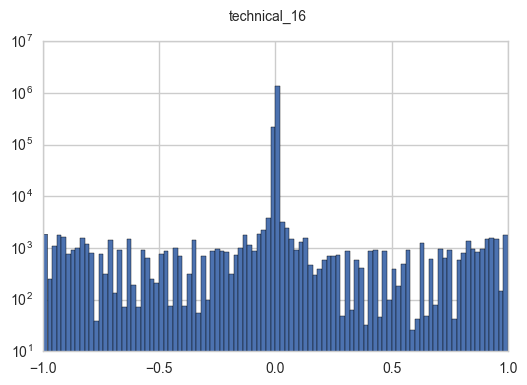

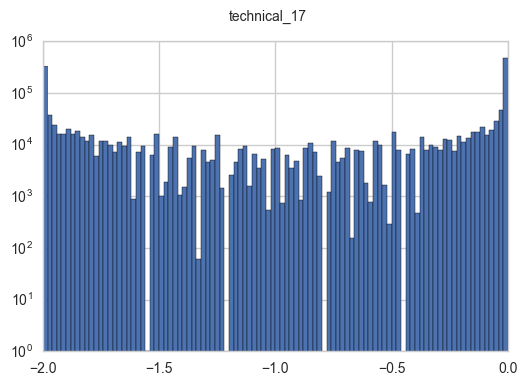

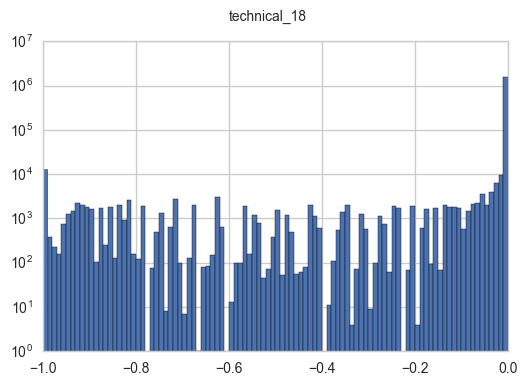

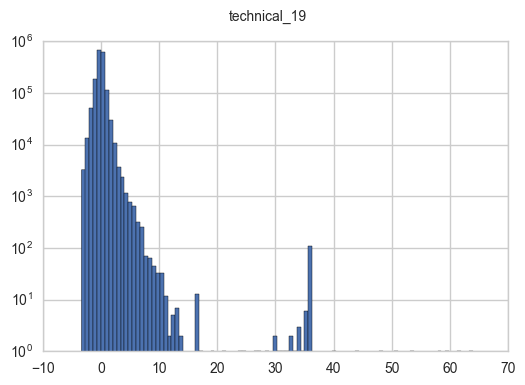

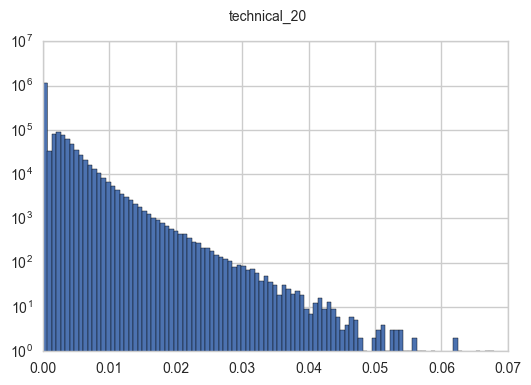

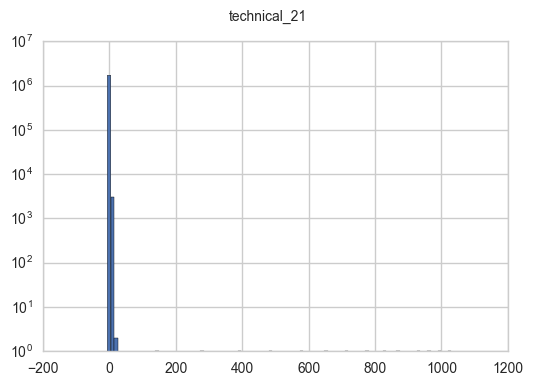

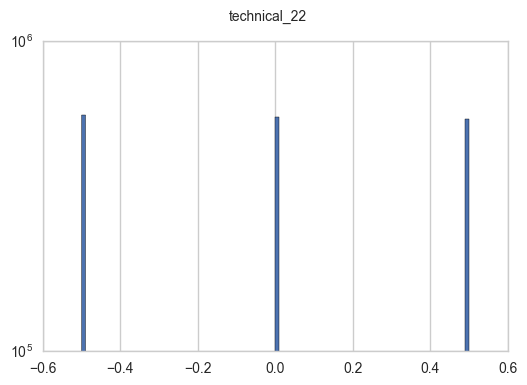

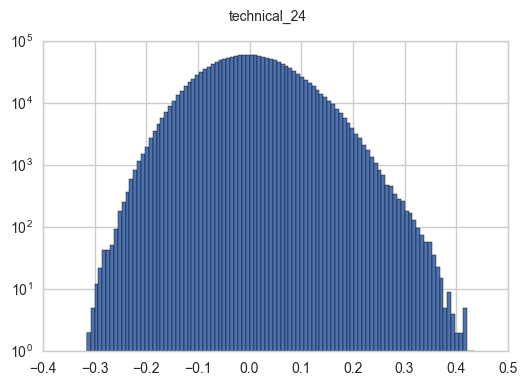

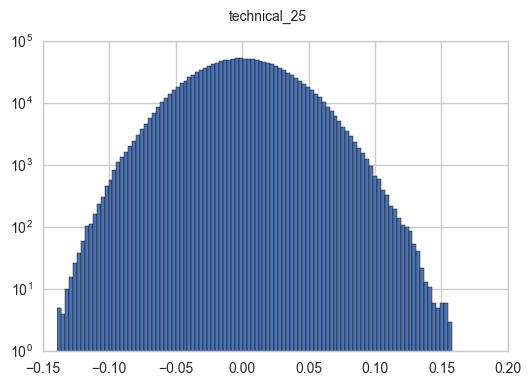

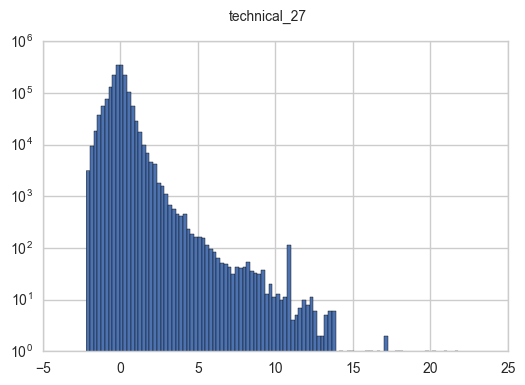

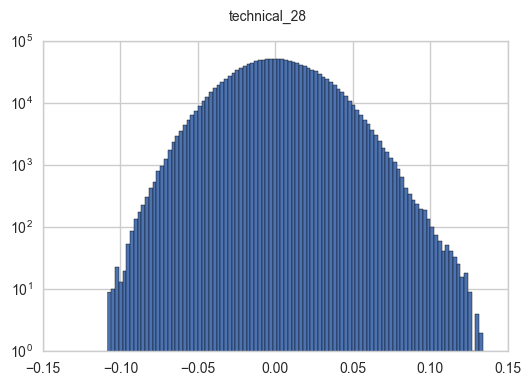

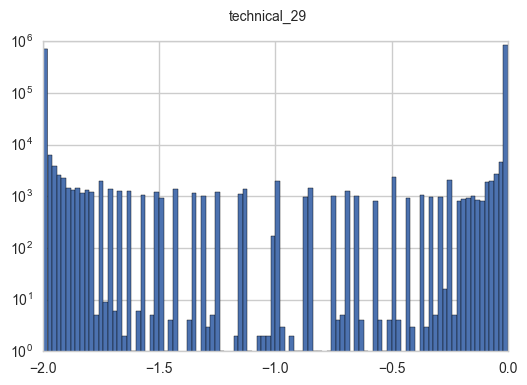

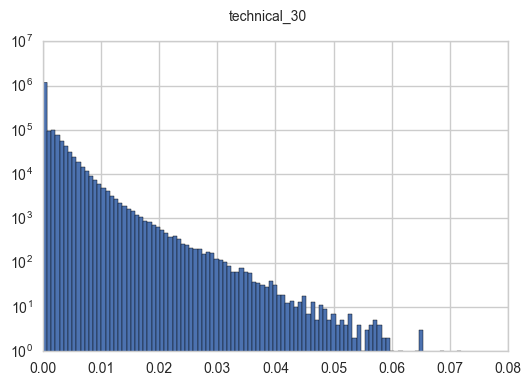

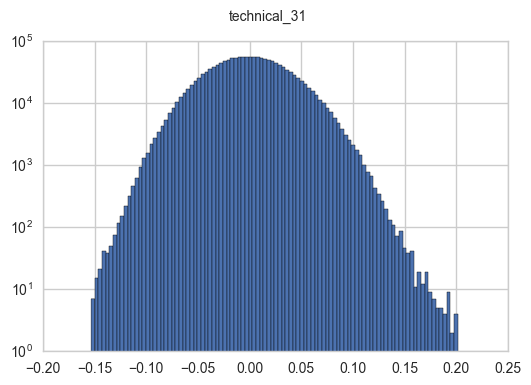

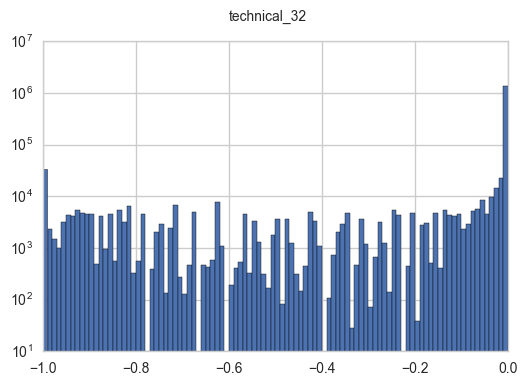

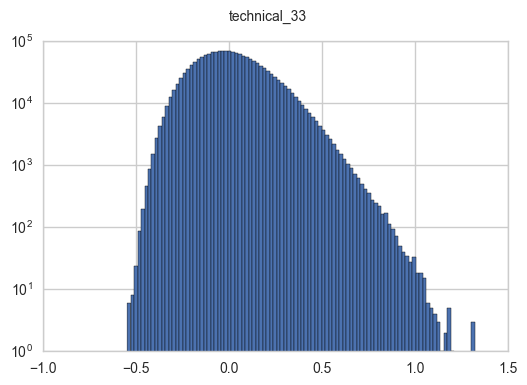

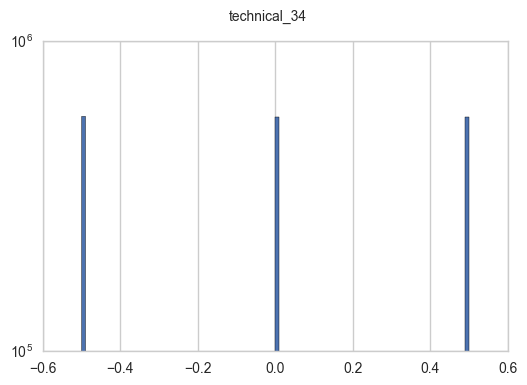

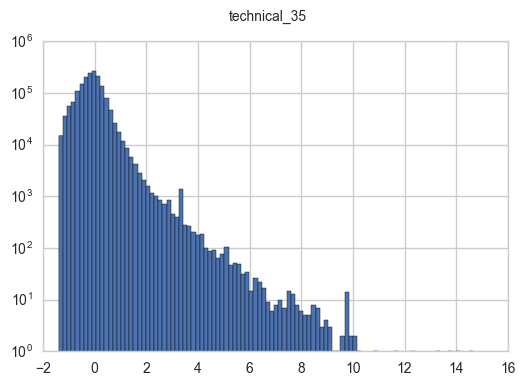

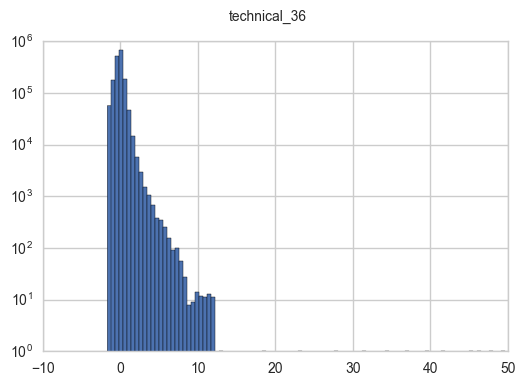

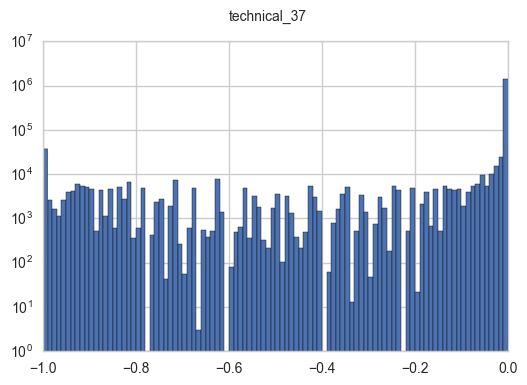

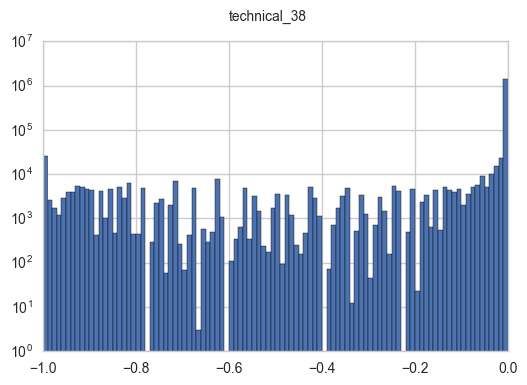

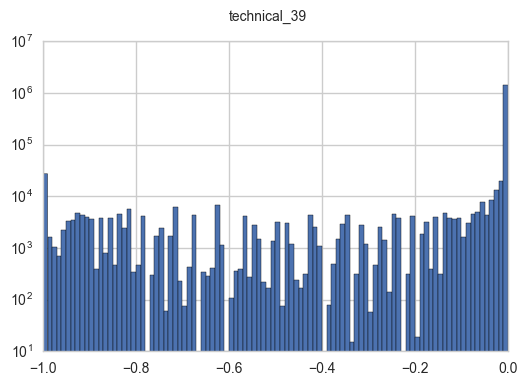

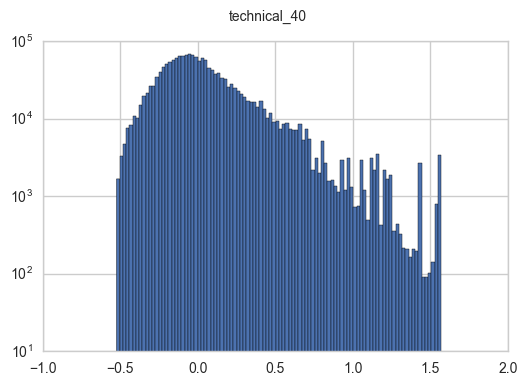

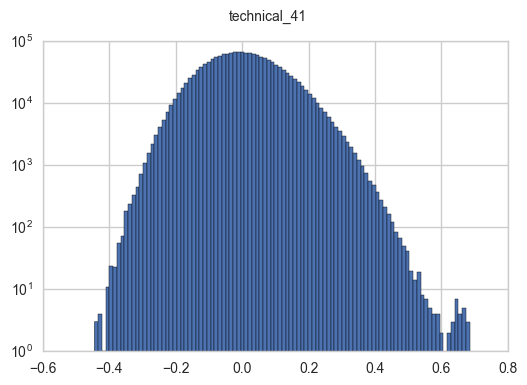

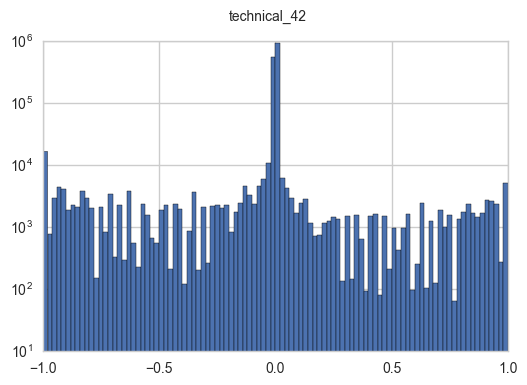

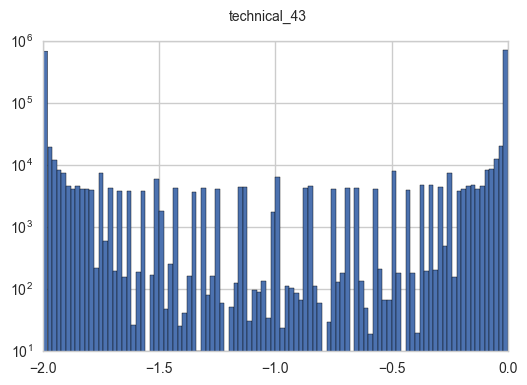

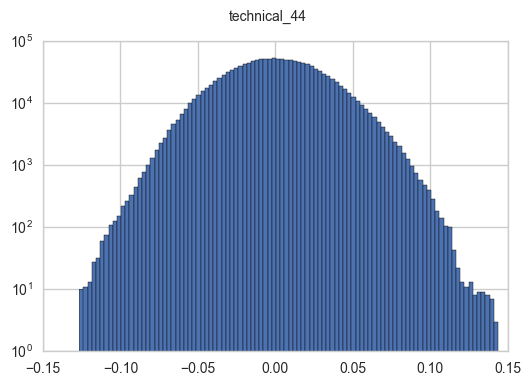

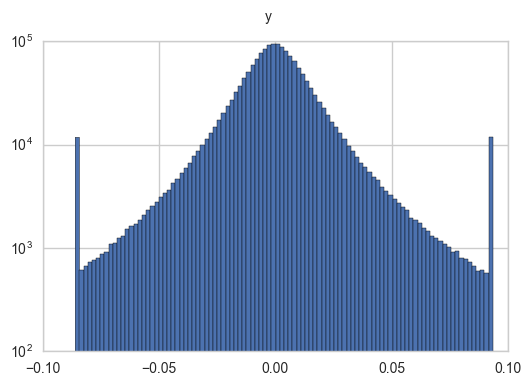

In [3]:
# Let's try to plot the histogram for each of the column.

def PlotHistogram(df, column):
    # Creates a new figure for plotting.
    fig = plt.figure()
    df[column].dropna().hist(bins=100, log=True)
    fig.suptitle(column)
    plt.show()

# It seems like some of the distribution are Normal, but others are
# more like Zipf distribution.
for column in df.columns:
    if column.startswith('fundamental_', 'derived_', 'technical_'):
        PlotHistogram(df, column)

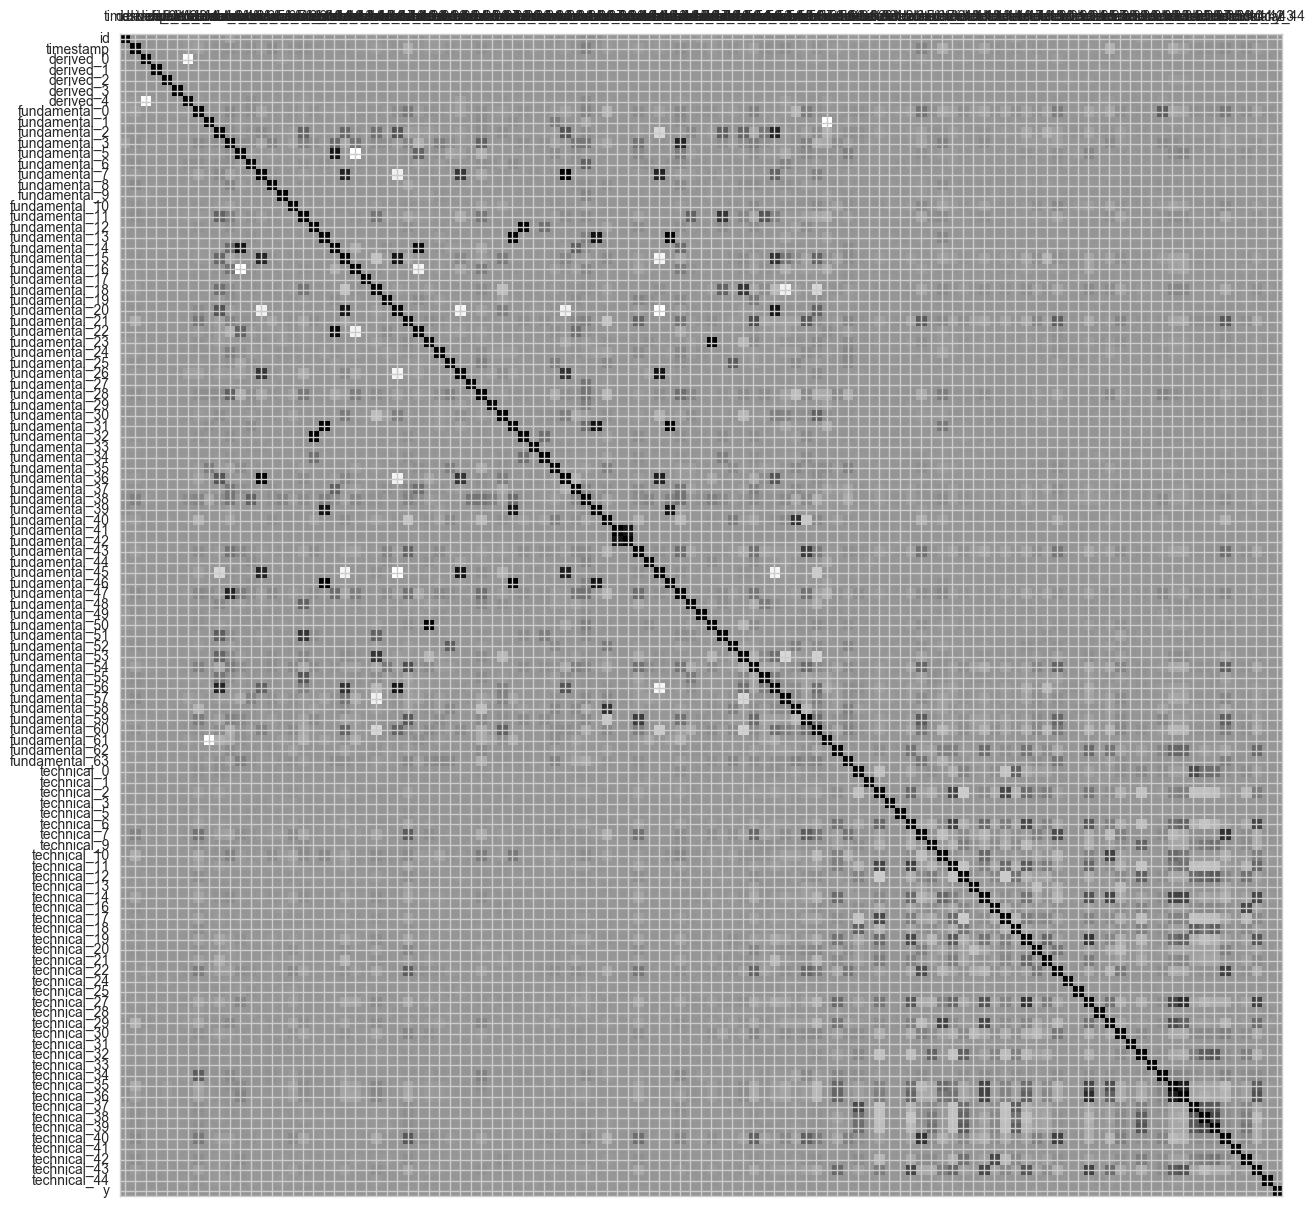

In [8]:
# See the correlation between each pair-wise columns.
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr, vmin=0, vmax=1, cmap=plt.get_cmap('hot'))
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    return corr

corr_df = plot_corr(df, 15)

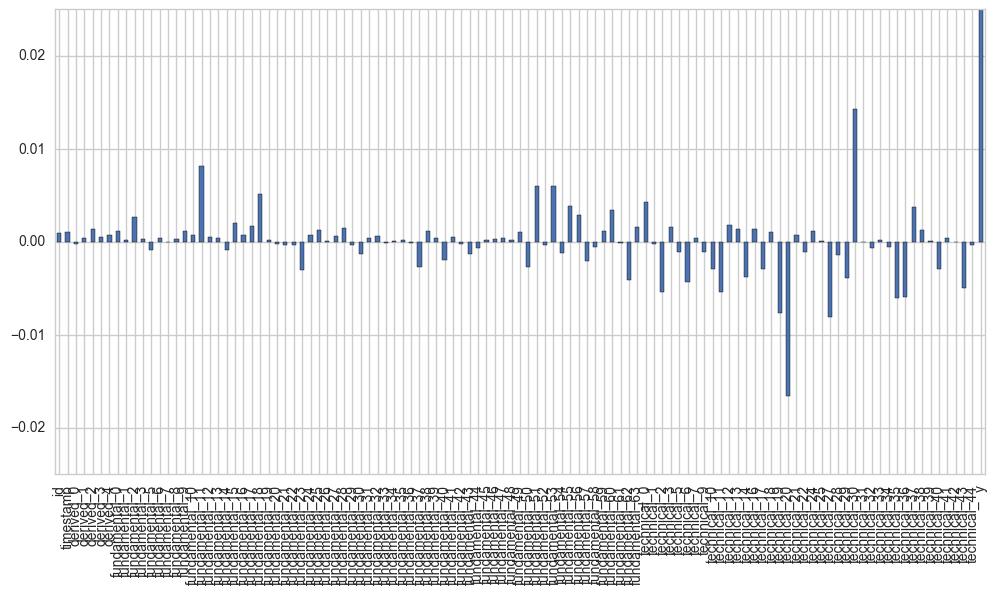

In [23]:
# Seems like most correlation is very weak, only at < abs(0.005)?
corr_df['y'].plot(kind='bar', figsize=(12,6), ylim=(-0.025, 0.025))